# Hands-on 05: Modulação Analógica (AM-DSB, AM-DSB-SC, AM-SSB, QAM, FM

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre modulação de onda contínua AM e FM (banda-passante);
- Fazer uma breve revisão sobre demodulação de onda contínua AM e FM (banda-passante);
- Fazer uma breve revisão sobre modulação em quadratura;
- Praticar com protótipos em Matlab e Python de moduladores AM-DSB, AM-DSB-SC, AM-SSB, QAM e FM.

## Modulação em Amplitude (AM - _Amplitude Modulation_)
    
Como a maioria dos sinais em banda-base são de baixa frequência, estes não podem ser transmitidos efetivamente via rádio (sem fio). Além de viabilizar a transmissão sem fio e em longa distância, modular sinais em banda-passante permite a organização de canais em frequências não sobrepostas, possibilitando realizar duplexação, multiplexação e múltiplo acesso de maneira eficiente. Essa organização em frequência não sobrepostas faz com que vários sinais sejam transmistidos ao mesmo tempo sem que interfiram entre si. Para que isso seja feito, cada sinal é modulado com portadoras de frequências diferentes, ocupando uma extensão de frequências pré-definida (largura de banda do canal).

Neste experimento adotaremos a seguinte notação:
- **$m(t)$** : Sinal em banda-base (sinal modulante);
- **$W$**    : Banda do sinal em banda-base (sinal modulante);
- **$c(t)$**: Sinal portadora de alta frequência;
- **$f_{c}$**: Frequência da portadora não modulada;
- **$s(t)$**: Sinal em banda-passante (sinal modulado);
- **$B$**: Banda do sinal em banda-passante (sinal modulado).

Um sinal mensagem $m(t)$ pode ser usado para **modular qualquer um dos parâmetros (amplitude, frequência e fase)** da onda portadora $c(t)$, permitindo que o sinal modulado $s(t)$ transporte $m(t)$ do transmissor para o receptor. Considerando uma portadora escrita como:

$$c(t) = A\cdot cos(2\pi f t + \theta),$$

podemos definir:

- Modulação em Amplitude (AM) $\Rightarrow $ Amplitude $A$ é proporcional a $m(t)$; 
- Modulação em Frequência (FM) $\Rightarrow $ Frequência $f$ é proporcional a $m(t)$; 
- Modulação em Fase (PM) $\Rightarrow $ Fase $\theta$ é proporcional a $m(t)$.

### Modulação AM-DSB (Double-SideBand)

Como defindo acima, na modulação AM a amplitude é quem carrega a informação a ser enviada, sendo frequência e fase constantes. Considerando um tom senoidal $m(t) = A_mcos(2 \pi  f_{m} t)$ como entrada, a equação que descreve a onda AM-DSB é:
$$s_{AM-DSB}(t)=A_{c}\cdot[1+m_{a}\cdot cos(2 \pi  f_{m} t)]\cdot cos(2\pi f_{c}t)$$       

Em que $A_c$ é a amplitude da portadora e $m_{a}$ é chamado de índice de modulação, defindo por:
$$m_{a}=\frac{A_{m}}{A_{c}}$$

Podemos expandir a equação da seguinte forma:

$$s_{AM-DSB}(t)=A_{c}\cdot cos(2\pi f_{c}t)+A_c \cdot m_a\cdot cos(2\pi f_{c}t)cos(2 \pi  f_{m} t)$$

Com algumas manipulações trigonométricas chegamos a:

$$s_{AM-DSB}(t)=A_{c}\cdot cos(2\pi f_{c}t)+ \frac{A_c \cdot m_a}{2} \cdot cos[2\pi (f_{c}-f_m)t]+ \frac{A_c \cdot m_a}{2} \cdot cos[2\pi (f_{c}+f_m)t]$$

Ao abservar o sinal acima, notamos que a portadora é completamente transmistida, e duas bandas laterais (inferior e superior) são formadas nas frequências $(f_c - f_n)$ e $(f_c + f_n)$. Por isso o nome DSB. Usando as propriedades da transformada de Fourier do cosseno, chegamos ao espectro do sinal $s_{AM-DSB}(t)$ como:

$$S_{AM-DSB}(f)=\frac{A_{c}}{2} \cdot \left [ \delta(f-f_c)+\delta(f+f_c) \right ] + \frac{A_{c} \cdot m_a}{4} \cdot \left [ \delta(f+f_c-f_m)+\delta(f-f_c+f_m) \right ] + \frac{A_{c} \cdot m_a}{4} \cdot \left [ \delta(f+f_c+f_m)+\delta(f-f_c-f_m) \right ]$$

Note também que a banda do sinal modulado é duas vezes a banda do sinal modulante. Visualmente, os sinais, no tempo e frequência, envolvidos no AM-DSB podem ser vistos na figura a seguir:

![fig_AM_DSB_TOM](../FIGS/HD_05/am_tom.png)

Para um sinal $m(t)$ qualquer, o AM-DSB é definido como:

$$s_{AM-DSB}(t)=A_{c}\cdot[1+k_{a}\cdot m(t)]\cdot cos(2\pi f_{c}t)$$

Em que $k_{a}$ é chamado de Sensibilidade de Amplitude do modulador. Usando a propriedade de Fourier $m(t)cos(2\pi f_{c}t)\Leftrightarrow \frac{1}{2}[M(f+f_{c})+M(f-f_{c})]$, podemos escrever o espectro do AM-DSB para uma entrada $m(t)$ qualquer, como:

$$s_{AM-DSB}(t)=\frac{A_{c}}{2} \cdot \left [ \delta(f-f_c)+\delta(f+f_c) \right ] + \frac{A_{c} \cdot k_a}{2} [M(f+f_{c})+M(f-f_{c})]$$

sendo $M(f+f_{c})$ deslocamento para direita e $M(f-f_{c})$ deslocamento para esquerda. Nota-se novamente a formação de uma banda superior  (USB, Upper SideBand) à $f_{c}$ e uma banda inferior (LSB, Lower SideBand) à $f_{c}$. Ambas bandas laterais tem largura de banda $B = 2W$ (para um $m(t)$ qualquer de banda $W$). A figura a seguir ilustra o espectro dos sinais envolvidos no AM-DSB para um $m(t)$ limitado em banda $W$. A figura a seguir ilustra os espectros dos sinais modulante e modulado.

![fig_AM_DSB_M](../FIGS/HD_05/am_dsb_mt.png)

# Prática 1: Modulação AM-DSB

Nessa prática os sinais envolvidos na modulação AM-DSB são gerados e visualizados no tempo e na frequência.

**Passo 01:** Abra um script no Matlab, salve-o como **handson5_1.m** e escreva o seguinte código:

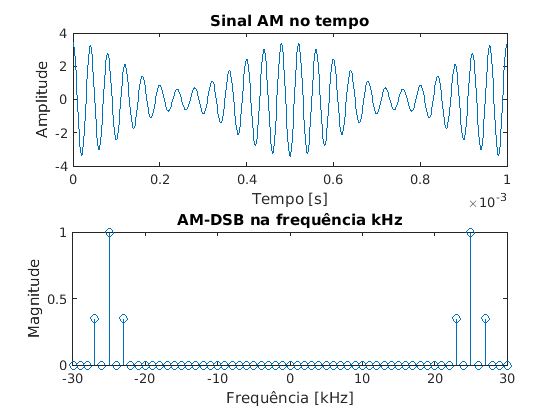

In [2]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ac = 2;                                                         % Amplitude da portadora
Mu = 0.7;                                                       % Índice de modulação
fc = 25000;                                                     % Frequência da portadora Hz
fm = 2000;                                                      % Frequência do sinal Hz
Ts = 1e-6;                                                      % Tempo de amostragem pequeno (modelar sinal contínuo)
t = [0:999]*Ts;                                                 % Definição do vetor tempo
s = Ac*(1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                   % Modulação AM      

%% Cálculo da FFT de AM-DSB
lfft=30;                                                        % Número de elementos da fft
k = [-lfft:lfft];                                               % Vetor de frequências 
Nx = length(s);                                                 % Comprimento do sinal modulado
Nk = length(k);                                                 % Comprimento do sinal em frequência
Xk = fft(s)/Nx;                                                 % Cálculo da FFT

%% A fft em 30 pontos (para melhor visualização)
c = zeros(1,Nk);                                                % Inicialização do vetor da magnitude
fsampling = 1/Ts;                                               % Taxa de amostragem
freq = k*fsampling/Nx;                                          % Eixo de frequências
for i = 1:Nk-1
    kk = k(i);
    if (kk >= 0),
        c(i) = Xk(kk+1);
    else
        c(i) = Xk(Nx+1+kk);
    end
end

%% Gráficos
subplot(2,1,1);
plot (t,s);                                                     % Gráfico do AM-DSB no tempo
title('Sinal AM no tempo');
xlabel('Tempo [s]');
ylabel('Amplitude');
subplot(2,1,2);
stem(freq/1e3,real(c));                                         % Gráfico do AM-DSB na frequência
title('AM-DSB na frequência kHz');                             
xlabel('Frequência [kHz]');
ylabel('Magnitude');
axis([-30 30 0 1]);

### Comentários sobre o código

- Sinal modulante é construído como um tom senoidal de frequência $f_m$ = 2 kHz (parâmetro de entrada);
- O índice de modulação $m_a$ = 0.7, a frequência da portadora $f_c$ = 25 kHz e a amplitude da portadora $A_c$ = 2 são parâmetros de entrada;
- Para melhor visualização do espectro, a fft foi amostrada em somente 30 pontos com o seguinte trecho de código:

```python
for i = 1:Nk-1
    kk = k(i);
    if (kk >= 0),
        c(i) = Xk(kk+1);
    else
        c(i) = Xk(Nx+1+kk);
    end
end
```

Pelo espectro do sinal modulado, pode-se verificar a formação de $M(f+f_{c})$ e $M(f-f_{c})$, adjacente a portadora, formando as parcelas USB (externa) e LSB (interna).

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_1.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

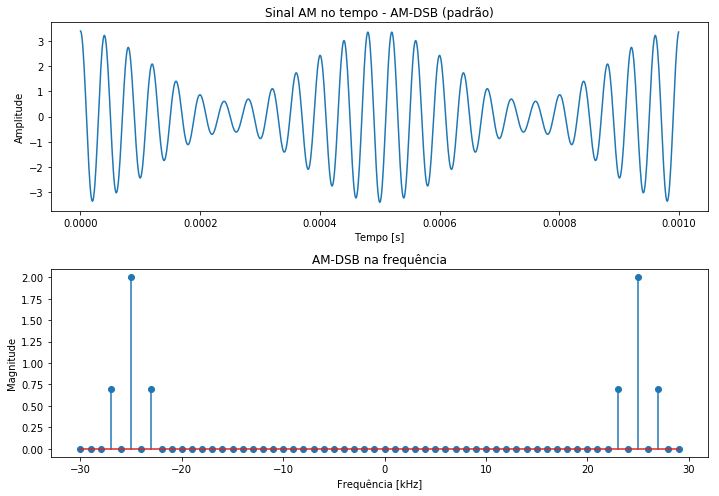

In [1]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu = 0.7                                                       # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f = 2.0*np.abs((fftpack.fft(s)))/N                           # Cálculo da FFT
Ns = len(s)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]

# Gráfico do AM-DSB no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(t,s)
plt.title("Sinal AM no tempo - AM-DSB (padrão)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

# Gráfico do AM-DSB na frequência
plt.subplot(212)
plt.title("AM-DSB na frequência")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq/1e3,S_f_new)
plt.tight_layout()
plt.show()

**Passo 3 (para o relatório):** mude o código em Python para expressar os três casos clássicos de modulação: (i) 100% de modulação; (ii) submodulação; e (iii) sobremodulação. Explique a diferença entres eles e evidencie nos gráficos suas características.


**Passo 4  (para o relatório):** use o que foi aprendido sobre cálculo de potência no [**hands-on 4** ](https://github.com/vicentesousa/DCO2004_2022/blob/main/notebooks/h04_python.ipynb) para calcular a potência com as amostras do sinal AM-DSB. Escreva um script em Python que calcule o valor teórico da potência do AM-DSB e que estime o valor da potência pelas amostras do sinal modulado. Qualquer método de cálculo de potência pode ser usado.

# Prática 2: Recepção AM-DSB (detecção de envoltória) 

Um circuito bem simples capaz de realizar a demodulação AM-DSB é composto por três elementos (diodo, resistor e capacitor), como mostrado na figura a seguir.

![Figura01](../FIGS/HD_05/EasyDEADemoduladorAM.png)

Inicialmente, o sinal AM-DSB é retificado pelo diodo, e simultâneamente, no ciclo positivo da onda, carrega o capacitor. Em seguida, o capacitor descarrega no resistor. Esse ciclo de carga e descarga do capacitor ocorre conforme a amplitude da onda AM-DSB é maior ou não do que a carga atual do capacitor. Assim, o circuito é capaz de seguir os picos positivos da onda AM, produzindo um sinal proporcional a sua envoltória. O sinal resultante desse circuito pode ser aplicado a um filtro e a um eliminador de componente DC, para que a onda $m(t)$ seja recuperada.

Montaremos um script que fará modulação AM-DSB e em seguida, modelando esse circuito, realizará sua demodulação. Faremos um laço com as condições de carga e descarga do capacitor e nele acrescentaremos a constante de descarga do capacitor no restistor ($\tau $).

**Passo 01:** Abra um script no Matlab, salve-o como **handson5_2.m** e escreva o seguinte código:

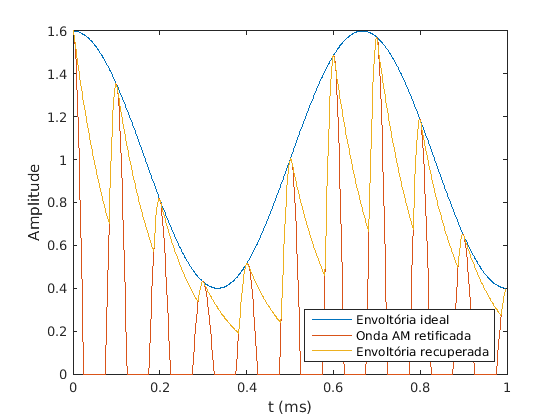

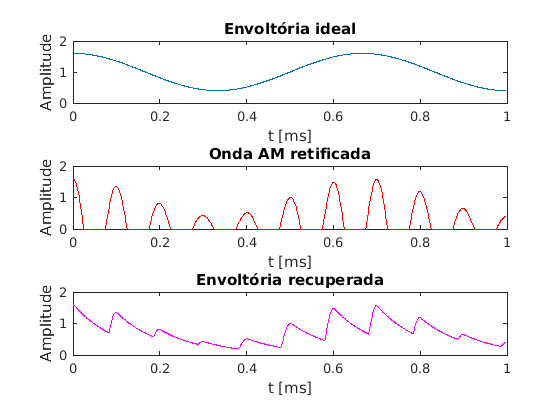

In [2]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
tau = 1e-4;                                                     % Constante de tempo do detector de envelope
t = [0:999]*1e-6;                                               % Definição do vetor tempo
Ts = 1e-6;                                                      % Definição do período
fc = 10000;                                                     % Frequência da portadora
fm = 1500;                                                      % Frequência do sinal
Mu = 0.6;                                                       % Índice de modulação
x_AMo = (1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                  % Onda Modulada AM-DSB

%% Envelope ideal do AM-DSB
x_envIdeal = abs(1+Mu*cos(2*pi*fm*t));

% Detector de envelope.
x_AM = x_AMo.*(x_AMo>0);                                        % Parte positiva da onda AM
x_env = zeros(size(x_AM));                                      % Vetor de zeros vetor pra guardar o envelope
nSamp = length(x_AM);                                           % Número de amostras da onda AM
out = -1;                                                       % Saída inicial (temporária)
%% Cálculo da saida
for i=1:nSamp,
    inp = x_AM(i);
    if (inp>=out)                                               % Caso 1: x_am(t) > Vc(t) (carga do capacitor)
        out = inp;
    else                                                        % Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
        out = out*(1-Ts/tau);
    end
    x_env(i) = out;
end

% Gráfico envoltória ideal
subplot(3,1,1);
plot(1000*t,x_envIdeal);
title('Envoltória ideal');
ylabel('Amplitude');
xlabel('t [ms]');
% Gráfico envoltória ideal
subplot(3,1,2);
plot(1000*t,x_AM,'r');
title('Onda AM retificada');
ylabel('Amplitude');
xlabel('t [ms]');
subplot(3,1,3);
plot(1000*t,x_env,'m');
title('Envoltória recuperada');
ylabel('Amplitude');
xlabel('t [ms]');

% Gráfico composto
figure;
plot(1000*t,x_envIdeal,1000*t,x_AM,1000*t,x_env);
ylabel('Amplitude');
xlabel('t (ms)');
legend('Envoltória ideal','Onda AM retificada','Envoltória recuperada','location','southeast');

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_2.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

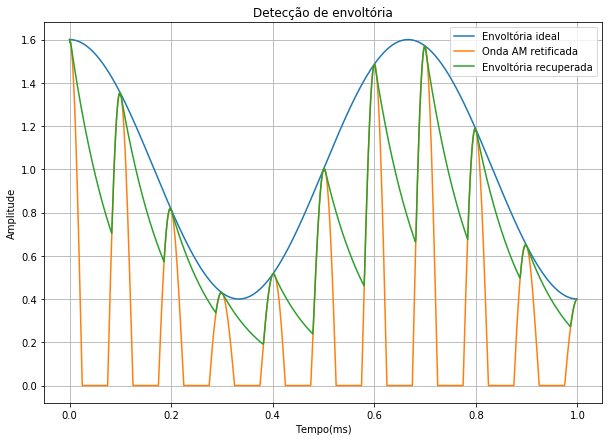

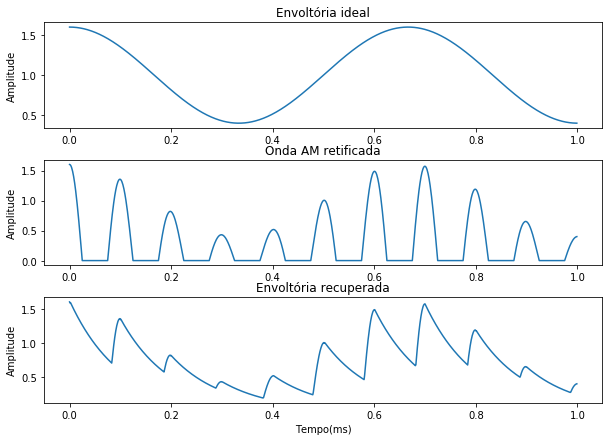

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

tau = 1e-4                                                      # Constante de tempo do detector de envelope
Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env[i] = out

# gráfico composto
plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada"])
plt.show()

## Gráficos com a função plt.plot()
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(t*1000,x_envIdeal)                             
plt.title("Envoltória ideal")
plt.ylabel("Amplitude")

plt.figure(1,[10,7])
plt.subplot(312)
plt.plot(t*1000,x_AM)                             
plt.title("Onda AM retificada")
plt.ylabel("Amplitude")

plt.figure(1,[10,7])
plt.subplot(313)
plt.plot(t*1000,x_env)                             
plt.title("Envoltória recuperada")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")

plt.subplots_adjust(hspace=0.3) # Ajustando espaço entre subplots

plt.show()

### Comentários sobre o código

- O sinal modulado é construído como um tom senoidal de frequência $f_m$ = 1,5 kHz, índice de modulação $m_a$ = 0,6, frequência da portadora $f_c$ = 10 kHz, a amplitude da portadora $A_c$ = 1 (todos parâmetros de entrada);

- Como esse é um código que está modelando o comportamento de um circuito, os parâmetros do circuitos podem (devem) estar presentes no código. Nesse exemplo simples, isso é materializado pelo parâmetro $\tau$ (constante de tempo do circuito);
- O efeito do diodo, que conduz somente no semiciclo positivo, é modelado por 

>```python
x_AM = x_AMo*(x_AMo>0)                                          
```

- Já o processo de carga e descarga do capacitor é modelado por:

>```python
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env[i] = out
>```
É possível perceber no código o efeito da carga (no semiciclo positivo relativo a carga já armazenada no capacitor) e de descarga (no semicíclo negativo em relação a carga já armazenada no capacitor).

Esse tipo de modulação é recomendado em sistemas de radiodifusão, em que há um grande número de receptores em relação ao de transmissores, sendo mais econômico um transmissor caro de alta potência e receptores baratos disponíveis ao público em geral.

**Passo 3 (para o relatório):** Escreva um script em python que calcule o erro médio quadrático entre a envoltória ideal e a envoltória recuperada para os seguintes valores de $\tau$: 

a) $\tau = 10^{-4}$;

b) $\tau = 2 \cdot 10^{-4}$;

c) $\tau = 4 \cdot 10^{-3}$.

Disserte sobre os três valores de $\tau$ e o valor do erro. Quais os fatores causadores do erro?

# Prática 3: Modulação AM-DSB-SC 

A modulação AM-DSB-SC consiste em suprimir a portadora da modulação AM-DSB, deixando o sinal modulado mais eficiente em termos de potência. Isso é efeito da eliminação do desperdício de potência em transmitir a portadora, pois no AM-DSB-SC, somente as bandas laterais são transmitidas, já que elas que carregam a informação $m(t)$. Em outras palavras, quando não houver sinal $m(t)$, não haverá sinal enviado ($s(t)$ = 0). 

Por definição, um sinal modulado em AM-DSB-SC é:

$$s(t) = m(t)\cdot c(t)$$

com $c(t) = A_c \cdot cos(2\pi f_{c}t)$.

Usando a propriedade de Fourier $m(t)cos(2\pi f_{c}t)\Leftrightarrow \frac{1}{2}[M(f+f_{c})+M(f-f_{c})]$, podemos escrever o espectro do AM-DSB-SC para uma entrada $m(t)$ qualquer, como:

$$s_{AM-DSB}(t)= \frac{A_{c}}{2} [M(f+f_{c})+M(f-f_{c})]$$

sendo $M(f+f_{c})$ um deslocamento para direita e $M(f-f_{c})$ um deslocamento para esquerda. Nota-se novamente a formação de uma banda superior  (USB, Upper SideBand) à $f_{c}$ e uma banda inferior (LSB, Lower SideBand) à $f_{c}$. Ambas bandas laterais tem largura de banda $B = 2W$ (para um $m(t)$ qualquer de banda $W$). Contudo, diferente do AM-DSB, a portadora não está presente no sinal $s(t)$.

Esse experimento tem como objetivo abrir um sinal pré-existente (arquivo **signal.mat**), modulá-lo em AM-DSB-SC e mostrar graficamente os sinais resultantes. Usamos um sinal disponibilizado no livro [SIGNALS and SYSTEMS - A MATLAB Integrated Approach do autor OKTAY ALKIN](http://www.signalsandsystems.org/home). O sinal está armazenado no arquivo **signal.mat** e o experimento também envolve a manipulação de dados em arquivos. Inicialmente, vamos abrir o arquivo e mostrar suas variáveis.

### Atenção Leonardo e Enzo: passar o trecho abaixo para Python

In [1]:
clc; clear all; close all;
load('../MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
whos                                       % Mostra as variáveis do workspace

  Name        Size            Bytes  Class     Attributes

  Ts          1x1                 8  double              
  msg       900x1              7200  double              
  t         900x1              7200  double              



- **msg**: É o sinal mensagem a ser modulado;
- **Ts**: É a taxa de amostragem que o sinal foi gerado;
- **t**: É o vetor de tempo do sinal.

A seguir, vamos mostrar graficamente o sinal.

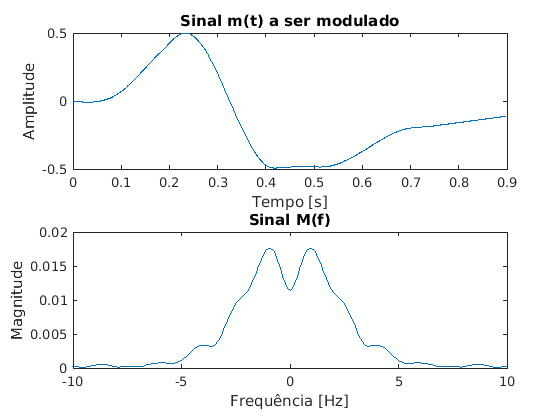

In [1]:
clc; clear all; close all;
load('./MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
%% Espectro do sinal
lfft=length(msg)*10;                       % Comprimento da fft (Arbitrário)
fs=1/Ts;
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);         % Eixo de frequência 
msgfft=fft(msg,lfft)/lfft;                 % Calcula a FFT
msgfft=fftshift(msgfft);
% Gráfico no tempo
subplot(2,1,1);
plot(t,msg);
title('Sinal m(t) a ser modulado');
ylabel('Amplitude');
xlabel('Tempo [s]')
% Gráfico na frequência
subplot(2,1,2);
plot (freq ,abs(msgfft));
title('Sinal M(f)');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-10 10 0 0.02]);

**Passo 1:** Abra um script no Matlab, salve-o como **handson5_3.m** e escreva o seguinte código:

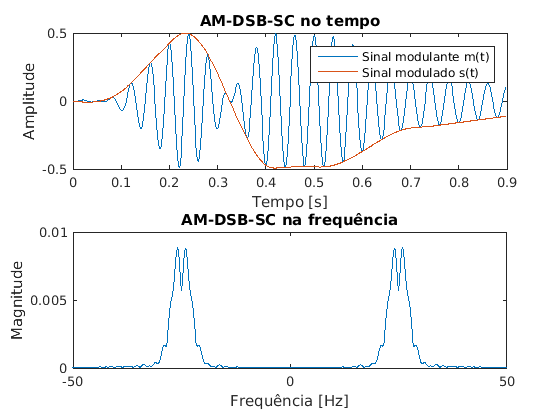

In [2]:
clc; clear all; close all;
load('./MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
fs=1/Ts;                                   % Frequência de amostragem
Ac = 1;                                    % Amplitude da portadora
fc = 25;                                   % Frequência da portadora
c = Ac*cos(2*pi*fc*t);                     % Sinal portadora
s= c.*msg;                                 % Sinal AM-DSB-SC
%% Espectro do sinal
lfft=length(s)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);         % Eixo de frequência 
Mfft=fft(s,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                      % Posiciona a FFT no centro
% Gráfico do AM-DSB-SC e a mensagem no tempo
subplot(2,1,1);
plot (t,s,t,msg);
legend('Sinal modulante m(t)','Sinal modulado s(t)');
title('AM-DSB-SC no tempo');
ylabel('Amplitude');
xlabel('Tempo [s]');
% Gráfico AM-DSB-SC e a mensagem na frequência 
subplot(2,1,2);
plot (freq ,abs(M_sig));
title('AM-DSB-SC na frequência');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-50 50 0 0.01]);

Para fazer esse experimento em Python, precisaremos de uma função para abrir arquivos **.mat**. Usaremos a função **loadmat($\cdot$)** disponibilizada na biblioteca a SciPy, e mostraremos seu uso no código a seguir. A função **loadmat($\cdot$)** retorna um variável do tipo dicionário. Em python, dicionários associam um valor a uma chave (string), similar a uma estrutura no Matlab. Por exemplo:

> 'variavel' : 25

A chave 'variavel' corresponde ao inteiro 25.

Dessa forma, os valores (values) podem ser facilmente acessados pelas chaves (keys), como exemplificaremos no código a seguir.

dict_keys(['Ts', 't', 'msg', '__globals__', '__header__', '__version__'])


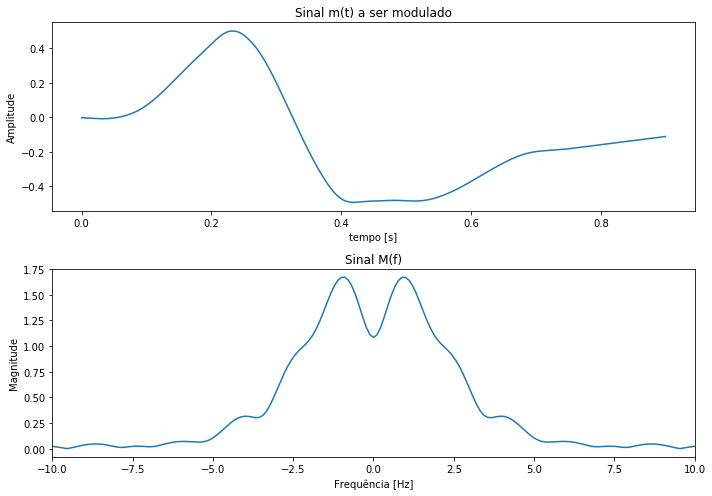

In [1]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
print(mat_data.keys())
t = mat_data['t'].flatten()
ts =  mat_data['Ts']
msg = mat_data['msg'].flatten()
fs = 1/ts
# Cálculo do espectro do sinal
lfft = len(msg)*10
freq = np.arange(-fs/2,fs/2,fs/lfft)
msgfft = np.fft.fft(msg,lfft)/np.sqrt(lfft)
msgfft= fftpack.fftshift(msgfft)
# Gráfico no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.title("Sinal m(t) a ser modulado")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,msg)
# Gráfico na frequência
plt.figure(1,[10,7])
plt.subplot(212)
plt.title("Sinal M(f)")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq,np.abs(msgfft))
plt.xlim([-10,10])

plt.tight_layout()
plt.show()

### Comentários sobre o código

- Para abrir o arquivo **signal.mat** usamos o seguinte código:
```python
mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
```

- Imprimimos todas as chaves (identificadores das variáveis) do arquivo com o seguinte código:
```python
print(mat_data.keys())
```

- Finalmente, para acessar os valores das variáveis usamos sua chave. Nós acessamos os valores das variáveis *t*, *ts* e *msg* com o seguinte código:
```python
t = mat_data['t'].flatten()
ts =  mat_data['Ts']
msg = mat_data['msg'].flatten()
```

Um detalhe muito importante desse acesso é o método **.flatten()**, próprio dos vetores tipo **numpy.ndarray** (padrão numpy), que transforma um vetor de _N_ dimensões para apenas uma. Fazendo isso, o usuário garante que os vetores serão 1-D no padrão Python (vetor linha), enquanto o padrão Matlab é vetor coluna. Isso pode evitar vários problemas em funções que manipulam vetores no padrão Python (1-D) e podem interpretar mal vetores 2-D. Esse tipo de problema é chato, pois as funções não mostram erros, mas estão fazendo os cálculos na dimensão errada do vetor. Se a variável em questão for uma matriz, não se deve usar o **.flatten()**. 

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_3.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

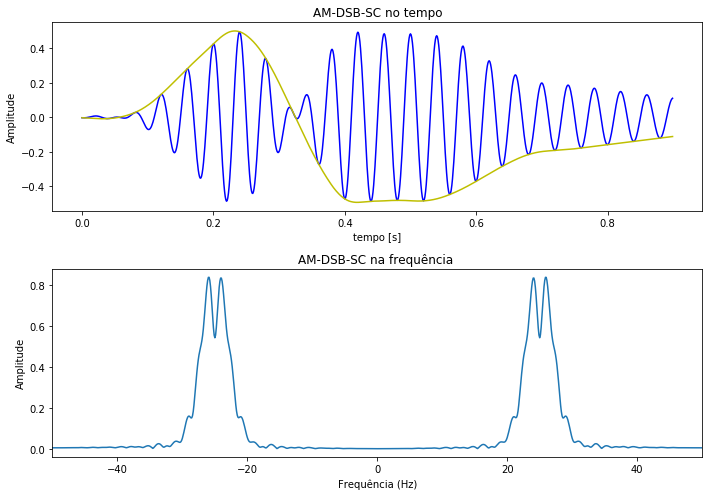

In [2]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
t = mat_data['t'].flatten()
ts =  mat_data['Ts']
msg = mat_data['msg'].flatten()
fs = 1/ts
Ac = 1                                                 # Amplitude da portadora
fc = 25                                                # Frequência da portadora
c = Ac*np.cos(2*np.pi*fc*t)                            # Sinal portadora
s = c*msg                                              # Sinal AM-DSB-SC
# Cálculo do espectro do sinal
lfft = len(s)*10
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(s,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
# Gráfico do sinal no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.title("AM-DSB-SC no tempo")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,s,'b',t,msg,'y')
# Gráfico do espectro do sinal
plt.subplot(212)
plt.title("AM-DSB-SC na frequência ")
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.plot(freq,np.abs(M_sig))
plt.xlim([-50,50])
plt.tight_layout()
plt.show()

### Comentários sobre o código

- O sinal modulante (do arquivo **signal.mat**) tem largura de banda de aproximadamente 5 Hz e é modulado por uma portadora de 25 Hz;
- A modulação é simples e realizada por meio do seguinte trecho de código:
```python
s= c*msg;  
```

- Considerando o sinal modulado $s(t)$ no tempo, vemos que o AM-DSB-SC não preserva o sinal $m(t)$ em sua envoltória;
- Já olhado para o sinal no domínio da frequência, nota-se novamente a formação de uma banda superior  (USB, Upper SideBand) e uma banda inferior (LSB, Lower SideBand) à 25 Hz (valor de $f_c$). Ambas bandas laterais tem largura de banda $B = 2W = 10 Hz$. Contudo, diferente do AM-DSB, a portadora não está presente no sinal $s(t)$.


# Prática 4: Demodulação AM-DSB-SC (detecção coerente) 

Diferente do AM-DSB, como o sinal modulante não se encontra na envoltória do sinal modulado, lançamos mão da demodulação coerente para recuperar o sinal modulante no AM-DSB-SC. A modulação coerente implica em termos um oscilador local no receptor e fazer seu uso para o processo de demodulação.

Demodular um sinal AM-DSB-SC em termos de código é simples, visto que basta multiplicar a portadora pelo sinal modulado e, em seguida, passar o sinal resultando por um filtro passa-baixa que teremos o sinal $m(t)$. Na prática, o atraso de propagação imprime uma fase aleatória ao sinal recebido, que precisa ser estimada e aplicada ao oscilador do receptor, para evitar distorção incontrolável no sinal demodulado (efeito nula de quadratura).

Esse experimento assumirá o perfeito sincronismo de fase entre transmissor e receptor, ficando fora do seu escopo o problema de estimar a fase no receptor (_carrier recovery_). Quem se interessar por esse assunto, uma boa maneira de começar a entender os problemas e as soluções clássicas é lendo o capítulo 10 do livro [Software Receiver Design: Build your Own Digital Communication System in Five Easy Steps](https://www.amazon.com/Software-Receiver-Design-Digital-Communication/dp/0521189446).

Assim, matematicamente falando, se o sinal AM-DSB-SC é $s(t) = m(t)\cdot c(t)$, a primeira etapa da demodulação AM-DSB-SC pode ser escrita como:

$$ m_r(t) = 2\cdot s(t)\cdot c(t) = 2 \cdot m(t) \cdot c^2(t)$$

Com $c(t) = A_c \cdot cos(2 \pi f_c t)$, temos:

$$ m_r(t) = 2 \cdot m(t) \cdot \frac{{A_c}^2}{2} \cdot [1 + cos(4\pi f_c t)] = {A_c}^2 \cdot m(t) +  {A_c}^2 \cdot m(t) \cdot cos(4\pi f_c t) $$

Fazendo $A_c = 1$, sem perda de generalidade, temos que a primeira etapa da demodulação AM-DSM-SC gera um sinal com uma componente em banda-base $\left ( m(t) \right)$ e uma componente em banda-pasante $\left ( m(t) \cdot cos(4\pi f_c t) \right)$, ficando:

$$ m_r(t) =  m(t) +  m(t) \cdot cos(4\pi f_c t) $$

Esse sinal ao ser submetido a um filtro passa-baixa (segunda etapa da demodulação), resulta em:

$$ m_{rf}(t) =  m(t) $$

Esse experimento tem o objetivo de mostrar essas etapas da demodulação AM-DSB-SC.

**Passo 1:** Abra um script no Matlab, salve-o como **handson5_4.m** e escreva o seguinte código:

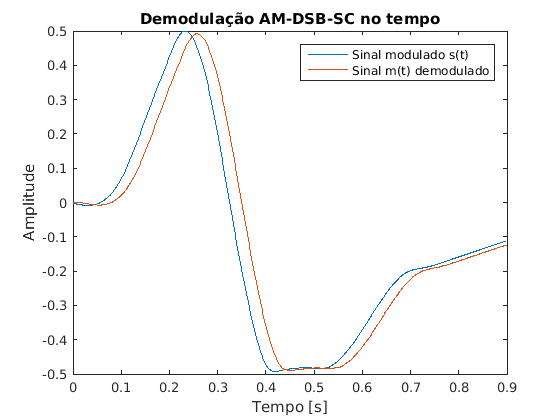

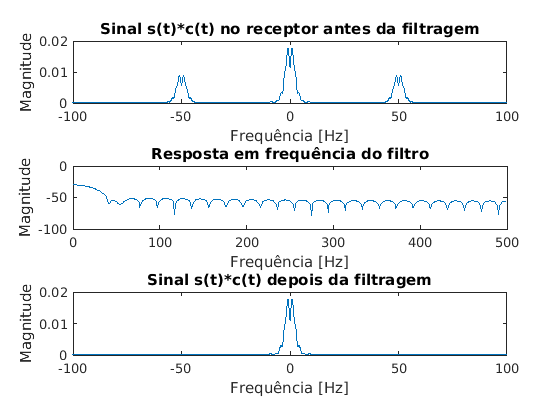

In [4]:
clc; clear all; close all;
load('./MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
fs=1/Ts;                                   % Frequência de amostragem
Ac = 1;                                    % Amplitude da portadora
fc = 25;                                   % Frequência da portadora
c = Ac*cos(2*pi*fc*t);                     % Sinal portadora
s = c.*msg;                                % Sinal AM-DSB-SC

% Demodulação AM-DSB-SC
mr = 2*s.*c;

% Filtragem do sinal
B_m = 5;                                     % Banda do sinal
h=fir1(50,[B_m*Ts]);                         % Coeficientes do filtro
mr_filtrado=filter(h,1,mr);                 % Sinal filtrado

% Espectro do sinal antes da filtragem
subplot(3,1,1);
lfft=length(mr)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);          % Eixo de frequência 
Mfft=fft(mr,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                       % Posiciona a FFT no centro
plot (freq ,abs(M_sig));
title('Sinal s(t)*c(t) no receptor antes da filtragem');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-100 100 0 0.02]);                            

% Resposta em frequência do filtro
subplot(3,1,2);
[amp,freq] = freqz(h,fs);
plot(freq*fs/(2*pi),10*log10(abs(amp)));
title('Resposta em frequência do filtro');
ylabel('Magnitude');
xlabel('Frequência [Hz]');

% Espectro do sinal depois da filtragem
subplot(3,1,3);
lfft=length(mr_filtrado)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);          % Eixo de frequência 
Mfft=fft(mr_filtrado,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                       % Posiciona a FFT no centro
plot (freq ,abs(M_sig));
title('Sinal s(t)*c(t) depois da filtragem');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-100 100 0 0.02]);

figure;
% Gráfico do sinais modulante e demodulado
plot (t,msg,t,mr_filtrado);
legend('Sinal modulado s(t)','Sinal m(t) demodulado');
title('Demodulação AM-DSB-SC no tempo');
ylabel('Amplitude');
xlabel('Tempo [s]');

Para fazer esse experimento em Python, usaremos os mesmos artifícios de manipulação de arquivos que já aprendemos na prática anterior. Contudo, iremos importar a biblioteca **scipy.signal** para termos acesso a função **freqz** que calcula a resposta em frequência de um filtro.

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_4.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

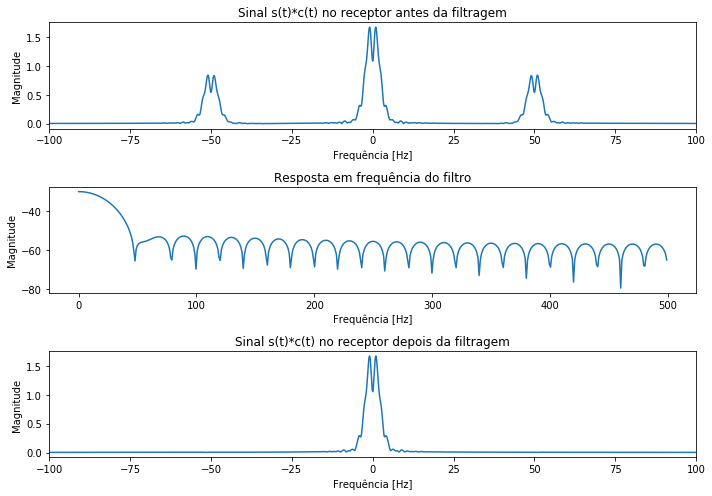

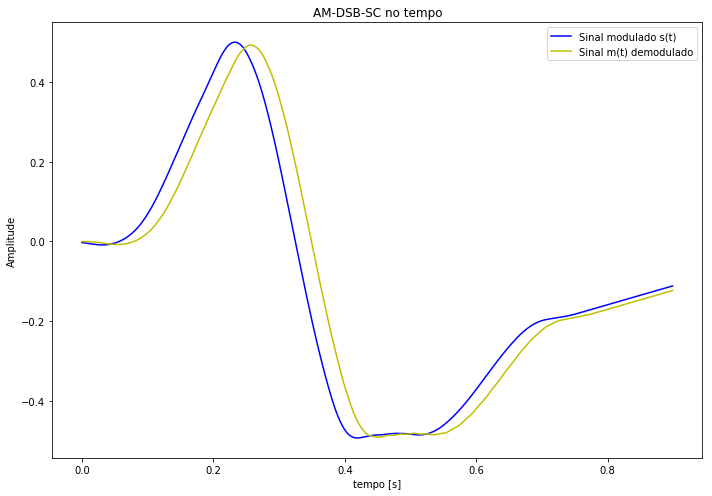

In [2]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy import signal

mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
t = mat_data['t'].flatten()
ts =  float(mat_data['Ts'])
msg = mat_data['msg'].flatten()
fs = 1/ts
Ac = 1                                                 # Amplitude da portadora
fc = 25                                                # Frequência da portadora
c = Ac*np.cos(2*np.pi*fc*t)                            # Sinal portadora
s = c*msg                                              # Sinal AM-DSB-SC

# Demodulação AM-DSB-SC
mr = 2*s*c;

# Filtragem do sinal
nyq_rate = fs / 2.0
cutoff_hz = 10                                         # Banda do sinal
h=signal.firwin(50,cutoff_hz/nyq_rate)                 # Coeficientes do filtro
mr_filtrado=signal.lfilter(h,1,mr)                     # Sinal filtrado

# Espectro do sinal antes da filtragem
lfft = len(mr)*10                                      # Comprimento da fft (Arbitrário)
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(mr,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
# Gráfico do sinal no tempo
plt.figure(1,[10,7])
plt.subplot(311)
plt.title("Sinal s(t)*c(t) no receptor antes da filtragem")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq ,abs(M_sig))
plt.xlim([-100,100])

# Resposta em frequência do filtro
plt.subplot(312)
[freq,amp] = freqz(h,fs)
plt.plot(freq*fs/(2*np.pi),10*np.log10(abs(amp)))
plt.title("Resposta em frequência do filtro")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")

# Espectro do sinal depois da filtragem
lfft = len(mr_filtrado)*10                                      # Comprimento da fft (Arbitrário)
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(mr_filtrado,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
plt.subplot(313)
plt.title("Sinal s(t)*c(t) no receptor depois da filtragem")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq ,abs(M_sig))
plt.xlim([-100,100])
plt.tight_layout()
plt.show()

# Gráfico do sinais modulante e demodulado
plt.figure(2,[10,7])
plt.title("AM-DSB-SC no tempo")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,msg,'b',t,mr_filtrado,'y')
plt.legend(['Sinal modulado s(t)','Sinal m(t) demodulado']);
plt.tight_layout()
plt.show()

### Comentários sobre o código

- O código implementa a primeira etapa da demodulação AM-DSB (multiplicação do sinal modulado pela portadora) no seguinte trecho de código:
```python
mr = 2*s.*c;
```

- A etapa de filtragem e recuperação do sinal é materializada no seguinte trecho de código:
```python
nyq_rate = fs / 2.0
cutoff_hz = 10                                         # Banda do sinal
h=signal.firwin(50,cutoff_hz/nyq_rate)                 # Coeficientes do filtro
mr_filtrado=signal.lfilter(h,1,mr)                     # Sinal filtrado
```
- O restante do código se destina a gerar o espectro do sinal antes de depois da filtragem, bem como a plotagem do sinal modulante e do sinal demodulado. Note que, ao não ser por um atraso causado pelo filtro, o sinal demodulado é idêntico ao sinal modulante.

# Prática 5: Modulação e demodulação AM-SSB

Como já visto anteriormente, nas modulações AM-DSB e AM-DSB-SC formam-se duas bandas laterais. Em consequência, a modulação AM-DSB requer o dobro de largura de banda do sinal em banda-base para a transmissão. Para melhorar a eficiência espectral, bem como a de potência de transmissão, basta transmitir uma das banda laterais (e.g. filtrando a outra), resultando em um novo tipo de transmissão, o AM-SSB. Além disso podemos suprimir a portadora do sinal, resultando n AM-DSB-SC. A demodulação do sinal AM-SSB-SC é exatamente a mesma de um sinal AM-DSB-SC. A grande vantagem do AM-SSB-SC está na economia de até 83% da potência de transmissão. Contudo, precisa-se de um oscilador no receptor tão preciso quanto o da AM-DSB-SC.

Nesse experimento exemplificamos o processo de modulação e demodulação AM-SSB. Inicialmente modula-se a onda AM em DSB-SC e em seguida é feita a filtragem de frequências superiores (LSB) ou inferiores (USB) da onda DSB, formando o AM-SSB. A demodulação coerente é feita em seguida, mostrando que é possível recuperar o sinal com somente a metade da banda do AM-DSB-SC.

**Passo 1:** Abra um script no Matlab, salve-o como **handson5_5.m** e escreva o seguinte código:

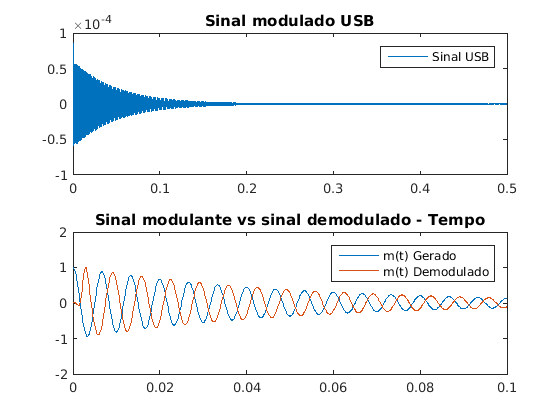

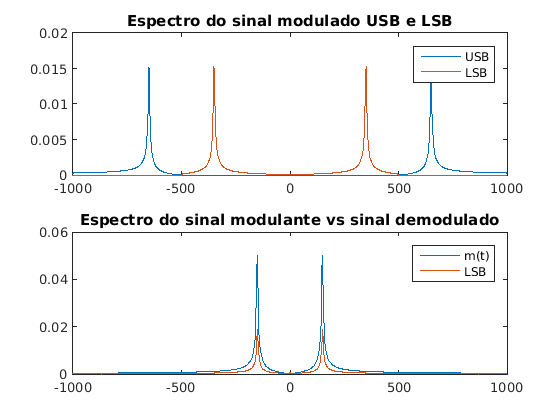

In [5]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ts=1e-4;                                                    % Período de amostragem
fs=1/Ts;                                                    % Frequência de amostragem
t = [0:5e3]*Ts;                                             % Definição do vetor tempo
fc = 500;                                                   % Frequência da portadora
fm = 150;                                                   % Frequência do sinal
Am=1;                                                       % Amplitude do sinal senoidal
Ac=1;                                                       % Amplitude da portadora
carrier = Ac*cos(2*pi*fc*t);                                % Sinal portadora
m_t = Am*cos(2*pi*fm*t).*exp(-t*20);                        % Sinal mensagem
lmt = length(m_t);                                          % Comprimento do vetor mensagem
M_t = fftshift(fft(m_t,lmt)/lmt);                           % Sinal na frequência
freq_m = (-fs/2:fs/lmt:fs/2-fs/lmt);                        % Eixo da frequência para M(f)
%% Modulação SSB
% Modulação DSB-SC
x_AM = m_t.*carrier;                                        % Onda Modulada DSB-SC
lfft = length(x_AM);                                        % Comprimento do sinal DSB-SC
lfft = 2^ceil(log2(lfft));                                  % Comprimento do sinal DSB-SC em potência de dois
X_AM = fftshift(fft(x_AM,lfft)/lfft);                       % Onda Modulada AM-DSB-SC na Frequência
freq = (-fs/2:fs/lfft:fs/2-fs/lfft);                        % Eixo da frequência 
L_lsb = floor(fc*Ts*lfft);                                  % Local na frequência que se encontra a LSB.
% Filtragem da LSB
Filt_LSB = ones(1,lfft);                                    % Vetor filtro LSB (degrau) na frequência 
Filt_LSB(lfft/2-L_lsb+1:lfft/2+L_lsb) = zeros(1,2*L_lsb);   % Definindo zeros na LSB
X_SSB_USB = X_AM.*Filt_LSB;                                 % Filtrando a frequência LSB
% Filtragem da USB
Filt_USB = zeros(1,lfft);                                   % Vetor filtro USB na frequência
Filt_USB(lfft/2-L_lsb+1:lfft/2+L_lsb) = ones(1,2*L_lsb);    % Onde tinha 1 agora tem 0
X_SSB_LSB = X_AM.*Filt_USB;                                 % Filtrando a frequência USB

%% Visualização SSB no tempo
% USB tempo
s_ssb_USB = real(ifft(fftshift(X_SSB_USB)));                % Inversa de Fourier
s_ssb_USB = s_ssb_USB (1:lmt);                              % Ajustando o comprimento do vetor
% LSB tempo
s_ssb_LSB = real(ifft(fftshift(X_SSB_LSB)));                % Inversa de Fourier
s_ssb_LSB = s_ssb_LSB (1:lmt);                              % Ajustando o comprimento do vetor

%% Demodulação
% Demodulação SSB-USB
s_dem_USB= s_ssb_USB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Filtro
s_rec_USB=filter(h,1e-4,s_dem_USB);                         % Sinal filtrado
% Espectro do sinal USB filtrado
lfft=length(s_rec_USB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potência de 2
SSB_freq_USB = fftshift(fft(s_rec_USB,lfft)/lfft);          % Sinal recuperado na frequência
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB;            % Amplificando o sinal

% Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Filtro
s_rec_LSB=filter(h,1e-4,s_dem_LSB);                         % Sinal filtrado
% Espectro do sinal LSB filtrado
lfft=length(s_rec_LSB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potência de 2
SSB_freq_LSB = fftshift(fft(s_rec_LSB,lfft)/lfft);          % Sinal recuperado na frequência
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB;            % Amplificando o sinal

%% Gráfico do espectro do Sinal 
% Espectros USB e LSB
subplot(2,1,1);
plot(freq,abs(X_SSB_USB),freq,abs(X_SSB_LSB));
legend('USB','LSB');
title ('Espectro do sinal modulado USB e LSB');
axis([-1e3 1e3 0 0.02]);
% Espectros LSB e m(t)
subplot(2,1,2);
plot(freq_m,abs(M_t),freq, abs(SSB_freq_USB));
title('Espectro do sinal modulante vs sinal demodulado');
legend('m(t)','LSB');
axis([-1e3 1e3 0 0.06]);
%% Gráfico do Sinal no tempo
figure();
% Sinal modulado USB
subplot(2,1,1);
plot(t,s_ssb_USB)
title('Sinal modulado USB')
legend('Sinal USB');
% Sinal m(t) e USB no tempo 
subplot(2,1,2);
plot(t,m_t,t,s_rec_USB);
axis([0 0.1 -2 2]);
title('Sinal modulante vs sinal demodulado - Tempo');
legend('m(t) Gerado','m(t) Demodulado');


Para fazer esse experimento em Python, iremos importar a biblioteca **scipy** para termos acesso a um conjunto de funções de manipulação de sinais.

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_4.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

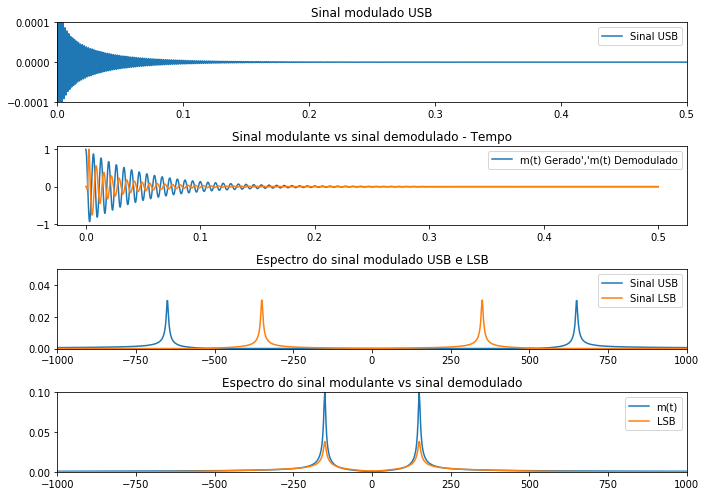

In [9]:
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
from scipy import signal

Ts=1e-4                                                    # Período de amostragem
fs=1/Ts                                                    # Frequencia de amostragem
t = np.arange(5e3)*Ts                                      # Definição do vetor tempo
fc = 500                                                   # Frequencia da portadora.
fm = 150                                                   # Frequencia do sinal
Am=1.0                                                     # Amplitude do sinal senoidal
Ac=1.0                                                     # Amplitude da portadora
carrier = Ac*np.cos(2*np.pi*fc*t)                          # Sinal portadora
m_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*20)                # Sinal mensagem
lmt = len(m_t)                                             # Comprimento do vetor mensagem
# Sinal na frequência
M_t = 2.0*np.abs(fftpack.fftshift(fftpack.fft(m_t,lmt)))/lmt
freq_m = np.arange(-fs/2,fs/2,fs/lmt)                      # Eixo da frequência para M(f)

## Modulação SSB
# Modulação DSB-SC
x_AM = m_t*carrier                                         # Onda Modulada DSB-SC 
lfft = len(x_AM)                                           # Comprimento do sinal DSB-SC
lfft = int(2**np.ceil(np.log2(lfft)))                      # Comprimento do sinal DSB-SC potência de dois
# Onda Modulada AM-DSB-SC na Frequência
X_AM = 2.0*np.abs(fftpack.fftshift(fftpack.fft(x_AM,lfft)))/lfft 
freq = np.arange(-fs/2,fs/2,fs/lfft)                       # Eixo da frequência 
L_lsb = int(np.floor(fc*Ts*lfft))                          # Local na frequência que se encontra a LSB.
# Filtragem da LSB
Filt_LSB = np.ones(lfft)                                   # Vetor filtro LSB (degrau) na frequencia 
Filt_LSB[lfft//2-L_lsb:lfft//2+L_lsb] = np.zeros(2*L_lsb)  # Definindo zeros na LSB
X_SSB_USB = X_AM*Filt_LSB                                  # Filtrando a frequência LSB
#Filtragem da USB
Filt_USB = np.zeros(lfft)                                  # Vetor filtro USB na frequencia  
Filt_USB[lfft//2-L_lsb:lfft//2+L_lsb] = np.ones(2*L_lsb)   # DOnde tinha 1 agora tem 0
X_SSB_LSB = X_AM*Filt_USB                                  # Filtrando a frequência USB

# USB tempo
# Inversa de fourrier
s_ssb_USB = np.real(fftpack.ifft(fftpack.fftshift(X_SSB_USB)))        
s_ssb_USB = s_ssb_USB[:lmt]                                # Ajustando o comprimento do vetor
# LSB tempo
# Inversa de fourrier
s_ssb_LSB =  np.real(fftpack.ifft(fftpack.fftshift(X_SSB_LSB)))     
s_ssb_LSB = s_ssb_LSB[:lmt]                                # Ajustando o comprimento do vetor

## Demodulação
# Demodulação SSB-USB
s_dem_USB= s_ssb_USB*carrier*2                             # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                                 # Filtro
s_rec_USB=signal.lfilter(h,1e-4,s_dem_USB)                 # Sinal filtrado
# Espectro do sinal USB 
lfft=len(s_rec_USB)                                        # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                        # Transformando para uma potencia de 2
# Sinal recuperado na frequência
SSB_freq_USB = fftpack.fftshift(fftpack.fft(s_rec_USB,lfft)/lfft)          
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB            # Amplificando o sinal

# Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB*carrier*2;                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                                 # Filtro
s_rec_LSB =signal.lfilter(h,1e-4,s_dem_LSB)                # Sinal filtrado
# Espectro do sinal LSB 
lfft=len(s_rec_LSB)                                        # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                        # Transformando para uma potência de 2
# Sinal recuperado na frequência
SSB_freq_LSB = fftpack.fftshift(fftpack.fft(s_rec_LSB,lfft)/lfft)          
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB            # Amplificando o sinal

## Gráficos dos sinais no tempo
# Sinal modulado USB
plt.figure(1,[10,7])
plt.subplot(411)
plt.title("Sinal modulado USB")
plt.plot(t,s_ssb_USB)
plt.legend(["Sinal USB"])
plt.ylim([-1e-4,1e-4])
plt.xlim([0,0.5])
# Sinal gerado vs sinal demodulado
plt.subplot(412)
plt.title("Sinal modulante vs sinal demodulado - Tempo")
plt.plot(t,m_t,t,s_rec_USB)
plt.legend(["m(t) Gerado','m(t) Demodulado"])

## Gráfico do espectro do Sinal 
# Espectros USB e LSB
plt.subplot(413)
plt.title("Espectro do sinal modulado USB e LSB")
plt.plot(freq,(X_SSB_USB),freq,(X_SSB_LSB)) 
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.05])
plt.legend(["Sinal USB","Sinal LSB"])
# Espectros LSB e m(t)
plt.subplot(414)
plt.title("Espectro do sinal modulante vs sinal demodulado")
plt.plot(freq_m,M_t,freq,2.0*np.abs(SSB_freq_USB)) 
plt.legend(["m(t)","LSB"])
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.1])
plt.tight_layout()
plt.show() 

### Comentários sobre o código

- O sinal modulante é composto por um tom de frequência 150 Hz mutiplicado por um sinal exponencial com constante de decaimento igual a 20:
```python
m_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*20)                # Sinal mensagem
```
- Inicialmente, uma modulação AM-DSB-SC é feita por meio de uma portadora com frequência igual a 500 Hz:
```python
carrier = Ac*np.cos(2*np.pi*fc*t)
...
x_AM = m_t*carrier 
```

- A filtragem USB e LSB é feita de maneira manual no domínio da frequência. Inicialmente, tomamos o espectro do sinal modulado AM-DSB-SC e multiplicamos por um vetor contendo zeros nas frequências que queremos eliminar e uns nas que queremos manter.
```python
X_SSB_USB = X_AM*Filt_LSB
...
X_SSB_LSB = X_AM*Filt_USB
```

- De posse desse sinal filtrado no domínio da frequência, usamos a ifft para obtê-los no domínio do tempo:
```python
s_ssb_USB = np.real(fftpack.ifft(fftpack.fftshift(X_SSB_USB)))        
...
s_ssb_LSB =  np.real(fftpack.ifft(fftpack.fftshift(X_SSB_LSB)))
```

- A demodulação é feita de maneira tradicional, multiplicando o sinal modulado pela portadora sincronizada em fase e usando um filtro passa-baixa para deixar passar somente o sinal em banda-base.
```python
s_dem_LSB= s_ssb_LSB*carrier*2;                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                                 # Filtro
s_rec_LSB =signal.lfilter(h,1e-4,s_dem_LSB)                # Sinal filtrado
```

- O restante do código se destina a gerar o espectro do sinal antes e depois da demodulação, bem como a plotagem do sinal modulante e do sinal demodulado. Note que, ao não ser por um atraso causado pelo filtro e uma atenuação, o sinal demodulado é idêntico ao sinal modulante.

# Prática 6: Modulação e demodulação QAM 

Obter eficiência espectral por meio da modulação AM-SSB torna-se complicado a medida que se necessita de filtros de alta precisão. Ainda temos o desafio de aplicar o AM-SSB em sinais com componentes de frequência significativos próximos a componente DC, pois precisaremos de um filtro que elime um banda lateral sem prejudicar a outra.

A modulação em amplitude em quadratura (QAM) aparece como uma alternativa de mesma eficiência espectral que o AM-SSB, mas sem as suas limitações. Por isso o uso de QAM torna-se uma solução viável, sendo gerada com exatidão sem exigência de filtros extremamente precisos.

Na modulação QAM, dois sinais $m_1(t)$ e $m_2(t)$ de banda $W$ são multiplexados em quadratura, de forma que são transmitidos ao mesmo tempo, usando a mesma banda do AM-DSB $(2W)$. Assim, ao transmitir dois sinais de banda $W$ ao mesmo tempo, a eficiência espectral é a mesma que o AM-SSB, i.e., mantém a relação de 1 para 1 entre a banda somada dos sinais modulantes e a banda do sinal modulado.

O diagrama de blocos da modulação QAM é mostrado na figura a seguir.

![fig_QAM_mod](../FIGS/HD_05/qam_mod.png)

O diagrama de blocos da demodulação QAM é mostrado na figura a seguir.

![fig_QAM_demod](../FIGS/HD_05/qam_demod.png)

Essa prática se destina a exemplificar o processo de modulação e demodulação QAM para dois sinais $m_1(t)$ e $m_2(t)$ diferentes.

**Passo 1:** Abra um script no Matlab, salve-o como **handson5_6.m** e escreva o seguinte código:

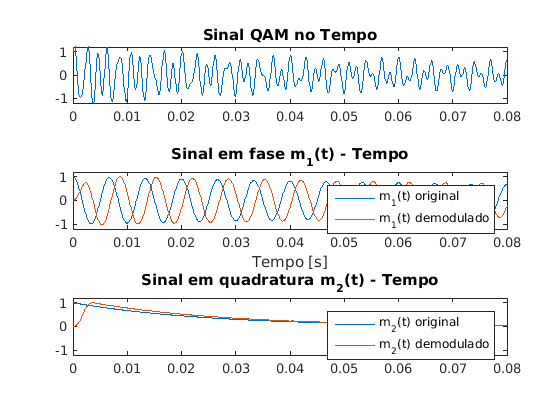

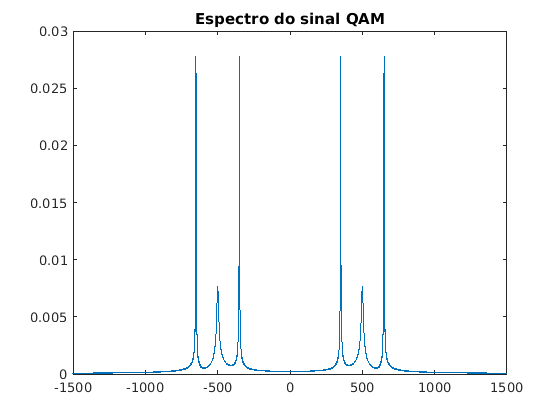

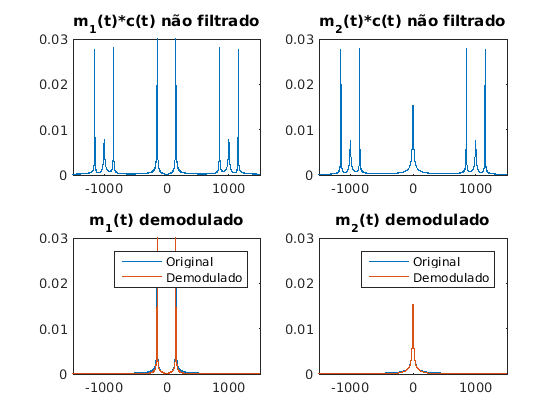

In [1]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ts=1e-4;                                                    % Período de amostragem
fs=1/Ts;                                                    % Frequência de amostragem
t = [0:5e3]*Ts;                                             % Definição do vetor tempo
fc = 500;                                                   % Frequência da portadora.
fm = 150;                                                   % Frequência do sinal
Am=1;                                                       % Amplitude do sinal senoidal
Ac=1;                                                       % Amplitude da portadora
carrierc = Ac*cos(2*pi*fc*t);                               % Sinal portadora cosseno (em fase)
carriers = Ac*sin(2*pi*fc*t);                               % Sinal portadora seno (em quadratura)
m1_t = Am*cos(2*pi*fm*t).*exp(-t*5);                        % Sinal mensagem (em fase)
m2_t = Am*exp(-t*40);                                       % Sinal mensagem (em quadratura)
B_m=150;                                                    % Banda para filtragem 
h=fir1(40,[B_m*Ts]);                                        % Filtro
lfft = length(t);                                           % FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = 2^ceil(log2(lfft)+1);                                % Comprimento da FFT em potência de 2
freqm = (-fs/2:fs/lfft:fs/2-fs/lfft);                       % Eixo da frequência 
M1 = fftshift(fft(m1_t,lfft)/lfft);                         % Sinal m1_t na frequência
M2 = fftshift(fft(m2_t,lfft)/lfft);                         % Sinal m2_t na frequência
%% Modulação QAM
% Modulação - Soma de duas DSB-SC ortogonais
x_qam = (m1_t).*(carrierc)+(m2_t).*(carriers);              % Sinal QAM no tempo
% Sinal na frequência 
lfft = length(t);                                           % FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = 2^ceil(log2(lfft)+1);                                % Comprimento da FFT em potência de 2
X_QAM=fftshift(fft(x_qam,lfft)/lfft);                       % Sinal QAM na frequência
freqm = (-fs/2:fs/lfft:fs/2-fs/lfft);                       % Eixo da frequência 

%% Demodulação QAM
% Separando sinais
m1_dem = x_qam.*cos(2*pi*fc*t)*2;                           % Demodulando m1_t
m2_dem = x_qam.*sin(2*pi*fc*t)*2;                           % Demodulando m2_t
M1_dem = fftshift(fft(m1_dem,lfft)/lfft);                   % m1_t na frequência antes da filtragem
M2_dem = fftshift(fft(m2_dem,lfft)/lfft);                   % m2_t na frequência antes da filtragem

% Filtro passa baixa
m1_rec=filter(h,1,m1_dem);                                  % Filtrando m1_dem 
M1_rec=fftshift(fft(m1_rec,lfft)/lfft);                     % Calculando o sinal recebido m1_rec na frequência
m2_rec=filter(h,1,m2_dem);                                  % Filtrando m2_dem 
M2_rec=fftshift(fft(m2_rec,lfft)/lfft);                     % Calculando o sinal recebido m2_rec na frequência
m1_rec = (max(m1_t)/max(m1_rec))*m1_rec;                    % Amplificando o sinal m1_rec
m2_rec = (max(m1_t)/max(m2_rec))*m2_rec;                    % Amplificando o sinal m2_rec

%% Sinais na frequência
% m1(t)*c(t) não filtrado
subplot(2,2,1)
plot(freqm,abs(M1_dem))
title('m_1(t)*c(t) não filtrado')
axis([-1500 1500 0 0.03 ])
% m1(t)*c(t) filtrado = m1(t) recuperado
subplot(2,2,3)
plot(freqm,abs(M1))
hold all;
plot(freqm,abs(M1_rec))
title('m_1(t) demodulado')
legend('Original','Demodulado');
axis([-1500 1500 0 0.03 ])
% m2(t)*c(t) não filtrado
subplot(2,2,2)
plot(freqm,abs(M2_dem))
title('m_2(t)*c(t) não filtrado')
axis([-1500 1500 0 0.03 ])
% m2(t)*c(t) filtrado = m2(t) recuperado
subplot(2,2,4)
plot(freqm,abs(M2))
hold all;
plot(freqm,abs(M2_rec))
title('m_2(t) demodulado')
legend('Original','Demodulado');
axis([-1500 1500 0 0.03 ])
% Espectro QAM
figure();
plot(freqm,abs(X_QAM))
title('Espectro do sinal QAM')
axis([-1500 1500 0 0.03 ])

%% Gráficos dos sinais no tempo
figure();
% Sinal QAM
subplot(3,1,1)
plot (t,x_qam)    
title('Sinal QAM no Tempo')
axis([0 0.08 -1.2 1.2 ])
% Sinal m1(t) demodulado
subplot(3,1,2);
plot (t,m1_t,t,m1_rec);
title('Sinal em fase m_1(t) - Tempo');
xlabel('Tempo [s]')
legend('m_1(t) original','m_1(t) demodulado');
axis([0 0.08 -1.2 1.2 ])
% Sinal m2(t) demodulado
subplot(3,1,3)
plot (t,m2_t,t,m2_rec)    
title('Sinal em quadratura m_2(t) - Tempo')
legend('m_2(t) original','m_2(t) demodulado');
axis([0 0.08 -1.2 1.2 ])

Para fazer esse experimento em Python, iremos importar a biblioteca **scipy** para termos acesso a um conjunto de funções de manipulação de sinais. 

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

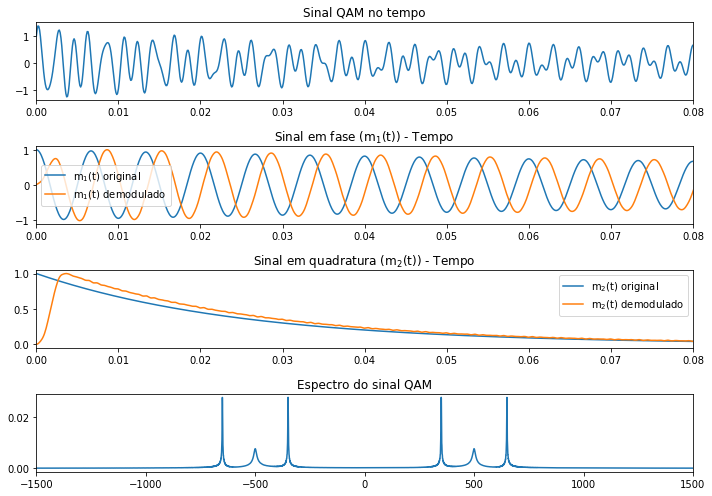

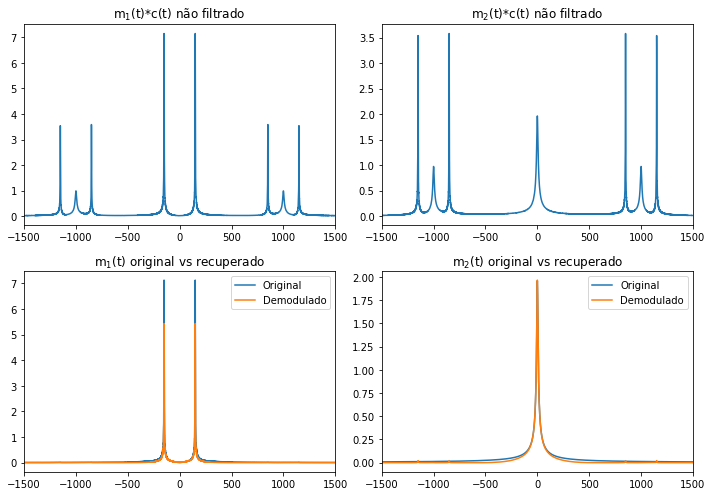

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.fftpack as ff
from scipy import signal

ts = 1e-4
fs = 1/ts
t = np.arange(0,5000,1)*ts
fc = 500
fm = 150                                                   # Frequencia do sinal
Am=1                                                       # Amplitude do sinal senoidal
Ac=1                                                       # Amplitude da portadora
carrierc = Ac*np.cos(2*np.pi*fc*t)                         # Sinal portadora cosseno
carriers = Ac*np.sin(2*np.pi*fc*t)                         # Sinal portadora seno
m1_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*5)                # Sinal mensagem
m2_t = Am*np.exp(-t*40)                                    # Sinal mensagem

lfft = len(t)                                              # FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = int(2**np.ceil(np.log2(lfft)+1))
freqm = np.arange(-fs/2,fs/2,fs/lfft)
M1 = ff.fftshift(ff.fft(m1_t,lfft)/np.sqrt(lfft))          # Sinal m1_t na frequência
M2 = ff.fftshift(ff.fft(m2_t,lfft)/np.sqrt(lfft))          # Sinal m2_t na frequência

# Modulação QAM
# Modulação - Soma de duas DSB-SC ortogonais
x_qam = (m1_t)*(carrierc)+(m2_t)*(carriers)                # Sinal QAM no tempo
# Sinal na frequência
X_QAM=ff.fftshift(ff.fft(x_qam,lfft,axis=0)/lfft)          # Sinal QAM na frequência
# Demodulação
# Separando os sinais
m1_dem = x_qam*np.cos(2*np.pi*fc*t)*2                      # Demodulando m1_t
m2_dem = x_qam*np.sin(2*np.pi*fc*t)*2                      # Demodulando m2_t

M1_dem = ff.fftshift(ff.fft(m1_dem,lfft)/np.sqrt(lfft))    # m1_t na frequência antes da filtragem
M2_dem = ff.fftshift(ff.fft(m2_dem,lfft)/np.sqrt(lfft))    # m2_t na frequência antes da filtragem

# Geração do filtro e filtragem do sinal
B_m = 150                                                  # Banda do filtro
a = 1                                                      # Numerador
b = signal.firwin(40, cutoff=B_m*ts, window='hamming')     # Denominador
m1_rec=signal.lfilter(b,a,m1_dem)                          # Filtrando m1_dem 
M1_rec=ff.fftshift(ff.fft(m1_rec,lfft)/np.sqrt(lfft))      # Espectro do sinal demodulado m1_rec 
m2_rec=signal.lfilter(b,a,m2_dem)                          # Filtrando m2_dem
M2_rec=ff.fftshift(ff.fft(m2_rec,lfft)/np.sqrt(lfft))      # Espectro do sinal demodulado m2_rec
m1_rec = (max(m1_t)/max(m1_rec))*m1_rec                    # Amplificando o sinal m1_rec
m2_rec = (max(m1_t)/max(m2_rec))*m2_rec                    # Amplificando o sinal m2_rec

# Graficos dos sinais no tempo
plt.figure(1,[10,7])
# Sinal QAM
plt.subplot(411)
plt.title("Sinal QAM no tempo")
plt.plot(t,x_qam)
plt.xlim([0,0.08])
# Sinal m1(t) demodulado
plt.subplot(412)
plt.title("Sinal em fase (m$_1$(t)) - Tempo")
plt.plot(t,m1_t,t,m1_rec)
plt.legend(["m$_1$(t) original","m$_1$(t) demodulado"])
plt.xlim([0,0.08])
# Sinal m2(t) demodulado
plt.subplot(413)
plt.title("Sinal em quadratura (m$_2$(t)) - Tempo")
plt.plot(t,m2_t,t,m2_rec)
plt.legend(["m$_2$(t) original","m$_2$(t) demodulado"])
plt.xlim([0,0.08])

## Gráficos do espectro
# Espectro do sinal QAM
plt.subplot(414)
plt.title("Espectro do sinal QAM")
plt.plot(freqm,np.abs(X_QAM))
plt.xlim([-1500,1500])
plt.tight_layout()
plt.show()

plt.figure(2,[10,7])
# m1(t)*c(t) não filtrado
plt.subplot(221)
plt.title("m$_1$(t)*c(t) não filtrado")
plt.plot(freqm,np.abs(M1_dem))
plt.xlim([-1500,1500])
# m1(t)*c(t) filtrado = m1(t) recuperado
plt.subplot(223)
plt.title("m$_1$(t) original vs recuperado")
plt.plot(freqm,np.abs(M1),freqm,np.abs(M1_rec))
plt.legend(["Original","Demodulado"])
plt.xlim([-1500,1500])
# m2(t)*c(t) não filtrado
plt.subplot(222)
plt.title("m$_2$(t)*c(t) não filtrado")
plt.plot(freqm,np.abs(M2_dem))
plt.xlim([-1500,1500])
# m1(t)*c(t) filtrado = m1(t) recuperado
plt.subplot(224)
plt.title("m$_2$(t) original vs recuperado")
plt.plot(freqm,np.abs(M2),freqm,np.abs(M2_rec))
plt.legend(["Original","Demodulado"])
plt.xlim([-1500,1500])

plt.tight_layout()
plt.show()

### Comentários sobre o código

- Agora no QAM existem dois sinais modulantes $m_1(t)$ e $m_2(t)$.  O sinal modulante $m_1(t)$ é composto por um tom de frequência 150 Hz multiplicado por um sinal exponencial com constante de decaimento igual a 5. Já o $m_2(t)$ é um sinal exponencial com constante de decaimento igual a 40. 
```python
m1_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*5)                # Sinal mensagem
m2_t = Am*np.exp(-t*40)                                    # Sinal mensagem
```
- Inicialmente, duas modulações AM-DSB-SC são feitas por meio de duas portadora ortogonais (em quadratura) com frequência igual a 500 Hz:
```python
carrierc = Ac*np.cos(2*np.pi*fc*t)                         # Sinal portadora cosseno
carriers = Ac*np.sin(2*np.pi*fc*t)                         # Sinal portadora seno
```

- O sinal QAM é montado seguindo sua definição:
```python
x_qam = (m1_t)*(carrierc)+(m2_t)*(carriers)                # Sinal QAM no tempo
```

- A demodulação QAM envolve a separação do sinal em fase e em quadratura por meio de suas respectivas portadoras:
```python
m1_dem = x_qam*np.cos(2*np.pi*fc*t)*2                      # Demodulando m1_t
m2_dem = x_qam*np.sin(2*np.pi*fc*t)*2                      # Demodulando m2_t
```

- Dessa forma, cada sinal, agora separado, passa pelo processo final de demodulação AM-DSB-SC, a filtragem em banda-base. Um filtro passa-baixa foi configurado de forma a deixar passar somente o sinal em banda-base.
```python
B_m = 150                                                  # Banda do filtro
a = 1                                                      # Numerador
b = signal.firwin(40, cutoff=B_m*ts, window='hamming')     # Denominador
m1_rec=signal.lfilter(b,a,m1_dem)                          # Filtrando m1_dem 
M1_rec=ff.fftshift(ff.fft(m1_rec,lfft)/np.sqrt(lfft))      # Espectro do sinal demodulado m1_rec 
m2_rec=signal.lfilter(b,a,m2_dem)                          # Filtrando m2_dem
M2_rec=ff.fftshift(ff.fft(m2_rec,lfft)/np.sqrt(lfft))      # Espectro do sinal demodulado m2_rec
```

- O restante do código se destina a gerar o espectro do sinal antes e depois da demodulação, bem como a plotagem do sinal modulante e do sinal demodulado. Note que, ao não ser por um atraso causado pelo filtro e uma atenuação, o sinal demodulado é idêntico ao sinal modulante.

# Prática 7: Modulação em Frequência (FM)

Sinais modulados em FM variam sua frequência instantânea linearmente com o sinal $m(t)$ de forma que:

$$ f_{i}(t)=f_{c}+k_{f}m(t)$$

sendo $k_{f} $ a sensibilidade de frequência do modulador, $f_{i}(t)$ a frequência instantânea da onda FM.

sendo $\phi_i(t)$ a fase instatânea da onda FM, temos a seguinte relação:

$$f_i(t) = \frac{1}{2 \pi}\frac{d\phi_i(t)}{dt}$$

Assim, podemos escrever:

$$ \phi_i(t) = 2 \pi f_{c} t +2\pi k_{f} \int_{0}^{t}m(\tau)\cdot d\tau $$

Logo, podemos expressar uma onda FM da seguinte forma:

$$ S_{FM}(t) = A_{c}\cdot cos \left[\phi_i(t) \right] = A_{c}\cdot cos \left[ 2 \pi f_{c} t +2\pi k_{f} \int_{0}^{t}m(\tau)\cdot d\tau \right]$$

Comparado ao AM, é vantajoso usar FM por que é uma modulação que oferece melhor desempenho perante ao ruído, devido a sua amplitude constante. Em contrapartida, a modulação FM requer maior largura de banda em relação a modulação AM, além de uma maior complexidade no receptor e no transmissor.

Visualmente, é possível distinguir ondas moduladas em AM e FM ao observar seu sinal no tempo. Enquanto no AM existe a variação na amplitude, no FM a amplitude é constante e a variação é percebida na frequência. A figura a seguir ilustra o comportamento temporal das duas modulações.

![fig_FM](../FIGS/HD_05/AM_FM_mod.png)

A demodulação FM pode ser feita por um circuito **discriminador de frequências**. Ele é composto de duas partes: (i) um circuito seletivo em frequência; e (ii) um detector de envoltória. O circuito seletivo em frequência nada mais é do que um sistema linear cuja resposta em frequência contém uma reta de derivada positiva (circuito diferenciador ou circuito rampa). Na prática, ele realiza uma conversão FM-AM. Assim, de posse de uma onda AM, aplicamos o detector de envoltória para recuperar $m(t)$. A figura a seguir mostra o diagrama de blocos desse receptor e como o sinal é processado em cada etapa da demodulação.

![fig_FM](../FIGS/HD_05/FM_demod.png)

Neste experimento faremos a modulação FM e a demodulação com um diferenciador ideal. 

**Passo 1:** Abra um script no Matlab, salve-o como **handson5_7.m** e escreva o seguinte código:

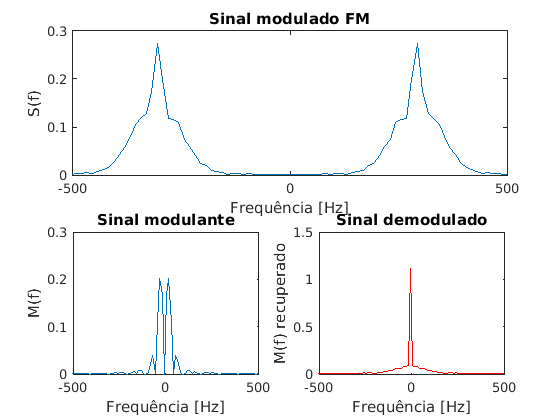

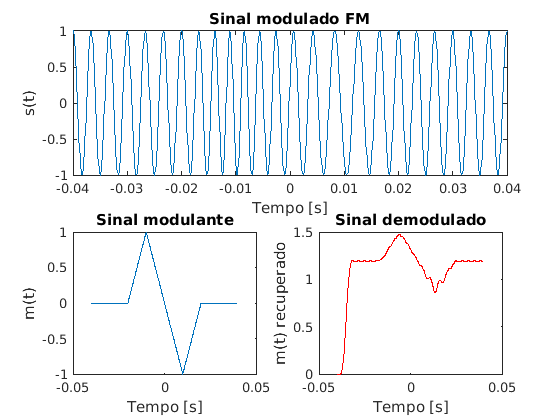

In [1]:
clear all; clc; close all
ts = 1e-4;                                                % Tempo de amostragem
t = -0.04:ts:0.04;                                        % Vetor do tempo
fc = 300;                                                 % Frequência da portadora
% Sinal modulante (duas funções triângulo)
% m = 1-|t| , if |t|<1
% m = 0 , if |t|>1
Ta = 0.01;                                                
mp1 = (1-abs((t+0.01)/Ta)).*((t+0.01)/Ta>=-1).*((t+0.01)/Ta<1); 
mp2 = (1-abs((t-0.01)/Ta)).*((t-0.01)/Ta>=-1).*((t-0.01)/Ta<1); 
msg = mp1-mp2;                                            % Sinal modulante 
% Espectro do sinal modulante
lfft = length(t);                                         % Tamanho da FFT
Mf = fftshift(fft(msg,lfft)/lfft);                        % Espectro centralidado
freqm = (-lfft/2:lfft/2-1)/(lfft*ts);                     % Eixo de frequência
% Definição do Filtro
B_m = 100;                                                % Largura de banda B_m Hz
h = fir1(80,[B_m*ts]);                                    % Filtro passa-baixa
% Modulação FM
kf = 160*pi;
m_int = kf*ts*cumsum(msg);                                % kf*Integral de m(t)
sfm = cos(2*pi*fc*t+m_int);                               % Sinal modulado em FM
% Espectro do sinal modulado
lfft = length(t);                                         % Tamanho da FFT
Sf = fftshift(fft(sfm,lfft)/lfft);                        % Espectro de s(t)

% Demodulação FM
s_fmdiff = diff([sfm(1) sfm])/ts/kf;                      % Derivada de s(t): conversão FM para AM
s_fmrec = s_fmdiff.*(s_fmdiff>0);                         % Parte 1 da detecção de envoltória: retificação
s_dem = filter(h,1,s_fmrec);                              % Parte 2 da detecção de envoltória: filtragem 

% Espectro do sinal modulado
lfft = length(t);                                         % Tamanho da FFT
Mf_rec = fftshift(fft(s_dem,lfft)/lfft);                  % Espectro de m(t) demodulado

% Gráficos no tempo
subplot(2,2,[1 2]);
% Sinal modulado FM 
plot(t,sfm);
xlabel('Tempo [s]'); 
ylabel('s(t)');
title('Sinal modulado FM');
subplot(2,2,3);
% Sinal modulante 
plot(t,msg);
xlabel('Tempo [s]'); 
ylabel('m(t)');
title('Sinal modulante');
% Sinal demodulado
subplot(2,2,4);
plot(t,s_dem,'r');
xlabel('Tempo [s]'); 
ylabel('m(t) recuperado');
title('Sinal demodulado');

% Espectro dos sinais
figure;
subplot(2,2,[1 2]);
% Sinal modulado FM 
plot(freqm,abs(Sf));
xlabel('Frequência [Hz]'); 
ylabel('S(f)');
title('Sinal modulado FM');
axis([-500 500 0 0.3]);
subplot(2,2,3);
% Sinal modulante 
plot(freqm,abs(Mf));
xlabel('Frequência [Hz]'); 
ylabel('M(f)');
title('Sinal modulante');
axis([-500 500 0 0.3]);
% Sinal demodulado
subplot(2,2,4);
plot(freqm,abs(Mf_rec),'r');
xlabel('Frequência [Hz]'); 
ylabel('M(f) recuperado');
title('Sinal demodulado');
axis([-500 500 0 1.5]);

Para fazer esse experimento em Python, iremos importar a biblioteca **scipy** para termos acesso a um conjunto de funções de manipulação de sinais. Como novidade, usaremos também o **subplot2grid** para organizar os gráficos.

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_7.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

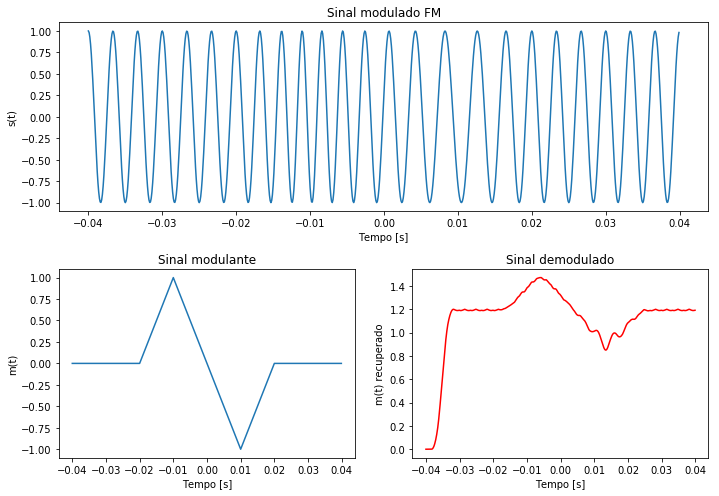

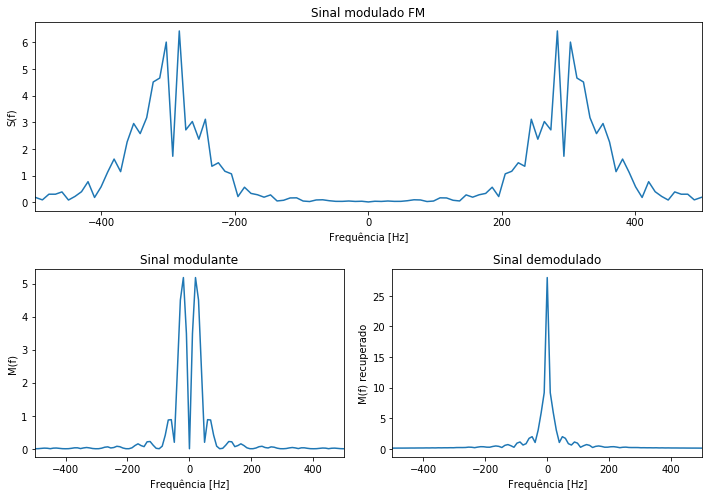

In [2]:
import numpy as np
import scipy.fftpack as ff
from scipy import signal
import matplotlib.pyplot as plt

ts = 1e-4                                        # Tempo de amostragem
t = np.arange(-0.04,0.04,ts)                     # Vetor do tempo
fc = 300;                                        # Frequência da portadora
# Sinal modulante (duas funções triângulo)
# m = 1-|t| , if |t|<1
# m = 0 , if |t|>1
Ta = 0.01                                                
mp1 = (1-np.absolute((t+0.01)/Ta))*((t+0.01)/Ta>=-1)*((t+0.01)/Ta<1) 
mp2 = (1-np.absolute((t-0.01)/Ta))*((t-0.01)/Ta>=-1)*((t-0.01)/Ta<1) 
msg = mp1-mp2;                                   # Sinal modulante

# Espectro do sinal modulante
lfft = len(t)                                    # Comprimento do vetor t
lfft = int(2**np.ceil(np.log2(lfft)))            # Transforma o comprimento em potência de 2
Mf = ff.fftshift(ff.fft(msg,lfft,axis=0)/np.sqrt(lfft))       
freqm = np.arange(-lfft/2,lfft/2,1)/(lfft*ts)    # Eixo da frequência

# Definição do Filtro
B_m = 100                                        # Largura de banda B_m Hz
h = signal.firwin(80,B_m*ts,window='hamming')    # Filtro passa-baixa

# Modulação FM
kf = 160*np.pi
m_int = kf*ts*np.cumsum(msg)                     # kf*Integral de m(t)
sfm = np.cos(2*np.pi*fc*t+m_int)                 # Sinal modulado em FM

# Espectro do sinal modulado
Sf = ff.fftshift(ff.fft(sfm,lfft,axis=0)/np.sqrt(lfft))       
  
# Demodulação FM
s_fmdiff = np.concatenate(([sfm[0]],sfm),axis=0)
s_fmdem = np.diff(s_fmdiff)/(ts*kf)              # Diferenciador repetindo o primeiro elemento 
s_fmrec = np.select([s_fmdem>0],[s_fmdem])       # Parte 1 da detecção de envoltória: retificação 
s_dem = signal.lfilter(h,1,s_fmrec)              # Parte 2 da detecção de envoltória: filtragem

# Espectro do sinal modulado
Mf_rec = ff.fftshift(ff.fft(s_dem,lfft,axis=0)/np.sqrt(lfft))       

# Gráficos no tempo
plt.figure(1,[10,7])
# Sinal demodulado
plt.subplot2grid((2, 2), (0, 0), colspan=2)
plt.plot(t,sfm)
plt.title('Sinal modulado FM')
plt.xlabel('Tempo [s]') 
plt.ylabel('s(t)')
# Sinal modulante 
plt.subplot2grid((2, 2), (1, 0))
plt.plot(t,msg)
plt.title('Sinal modulante')
plt.xlabel('Tempo [s]') 
plt.ylabel('m(t)')
# Sinal demodulado
plt.subplot2grid((2, 2), (1, 1))
plt.plot(t,s_dem,'r')
plt.title('Sinal demodulado')
plt.xlabel('Tempo [s]') 
plt.ylabel('m(t) recuperado')

plt.tight_layout()
plt.show()

# Espectro dos sinais
plt.figure(1,[10,7])
# Sinal demodulado
plt.subplot2grid((2, 2), (0, 0), colspan=2)
plt.plot(freqm,np.abs(Sf))
plt.xlim([-500,500])
plt.title('Sinal modulado FM')
plt.xlabel('Frequência [Hz]') 
plt.ylabel('S(f)')
# Sinal modulante 
plt.subplot2grid((2, 2), (1, 0))
plt.plot(freqm,np.abs(Mf))
plt.title('Sinal modulante')
plt.xlabel('Frequência [Hz]') 
plt.ylabel('M(f)')
plt.xlim([-500,500])
# Sinal demodulado
plt.subplot2grid((2, 2), (1, 1))
plt.plot(freqm,np.abs(Mf_rec))
plt.title('Sinal demodulado')
plt.xlabel('Frequência [Hz]') 
plt.ylabel('M(f) recuperado')
plt.xlim([-500,500])

plt.tight_layout()
plt.show()

### Comentários sobre o código

- O sinal modulante usado neste exemplo (baseado no livro [B. P. Lathi, Zhi Ding, Sistemas de comunicações analógicos e digitais modernos, LTC Editora; Edição 4, 9 de março de 2012](http://www.grupogen.com.br/sistemas-de-comunicacoes-analogicos-e-digitais-modernos)) não é estritamente limitado em banda e consiste de dois triângulos cotatenados:

$$m(t) = \Delta \left ( \frac{t+Ta}{Ta} \right) - \Delta \left ( \frac{t+Ta}{Ta} \right)$$

- No experimento, Ta = 0,01 e $m(t)$ é produzido com o seguinte trecho de código:
```python
Ta = 0.01:
mp1 = (1-np.absolute((t+0.01)/Ta))*((t+0.01)/Ta>=-1)*((t+0.01)/Ta<1) 
mp2 = (1-np.absolute((t-0.01)/Ta))*((t-0.01)/Ta>=-1)*((t-0.01)/Ta<1) 
msg = mp1-mp2;                                   # sinal modulante
```

- Para fazermos a modulação FM, foi definido um valor para $kf$ de 160$\pi$ e a integral discreta de $m(t)$ foi realizada pela função **cumsum**. O sinal FM é montado seguindo sua definição:
```python
kf = 160*np.pi
m_int = kf*ts*np.cumsum(msg)                     # kf*Integral de m(t)
sfm = np.cos(2*np.pi*fc*t+m_int)                 # Sinal modulado em FM
```

- A demodulação FM foi realizada por meio do método de discrimação de frequências. Incialmente, realiza-se a conversão FM para AM com a derivada do sinal modulado. A derivada foi obtida pela função **diff**. Essa função devolve um vetor com uma amostra a menos do que o vetor de entrada. Para matermos todos os vetores com o mesmo tamanho, derivamos um vetor com a primeira amostra repetida duas vezes. Assim, o vetor derivada final tem o mesmo tamanho do vetor do sinal gerado.
```python
s_fmdiff = np.concatenate(([sfm[0]],sfm),axis=0)
s_fmdem = np.diff(s_fmdiff)/(ts*kf)              # Diferenciador repetindo o primeiro elemento 
```

- De posse do sinal FM convertido para AM, realizou-se a deteção de envoltória para extrair o sinal demodulado $m(t)$:
```python
s_fmrec = np.select([s_fmdem>0],[s_fmdem])       # Parte 1 da detecção de envoltória: retificação 
s_dem = signal.lfilter(h,1,s_fmrec)              # Parte 2 da detecção de envoltória: filtragem
```

- O restante do código se destina a gerar o espectro do sinal antes e depois da demodulação, bem como a plotagem do sinal modulante e do sinal demodulado. Usamos a função **subplot2grid** para organizar a posição dos gráficos e subplots, uma boa documentação dessa função pode ser achada [aqui.](https://matplotlib.org/users/gridspec.html)

Comparando o sinal modulante com o sinal modulado, percebemos que, além  do atraso característico da demodulação por filtragem (deteção de envoltória), o resultado da demodulação FM está distorcido. A distorção ocorre porque quando o sinal da mensagem é negativo, a frequência instantânea é baixa, dificultando a demodulação pelo método de discriminação de frequências (o retificador gera poucos ciclos de meia senoide). Como usamos uma portadora de 300 Hz, esse efeito é mais forte, mas ele é despesível se usássemos uma frequência prática (na ordem de MHz). Não usamos tais frequências nos nossos experimentos devido a alta taxa de amostragem que seria necessária para expressar sinais em alta frequência (isso demandaria muito esforço computacional).

Outra comparação interessante é que, diferente do AM, o espectro do sinal modulado não mantém similaridades com o espectro do sinal modulante. Isso é algo bem característico de modulações AM, mas não é visto na FM.

# Prática 8: Sinal analítico, Transformada de Hilbert e seu uso em demodulação

Vimos até agora que o conceito de amplitude/fase/frequência instantânea é fundamental para transmissão da informação e aparece em muitas aplicações em processamento de sinais. Também sabemos que um sinal em banda-base $m(t)$ pode não ser apropriado para transmissão em meios de comunicação práticos e, para que isso ocorra, é necessário que esse sinal seja modulado (ou em banda-base ou em banda-passante). Para transmissão em longa distância, existe a necessidade do uso de uma portadora senoidal, gerando um sinal modulado em banda-passante $s(t)$. 

Assim, seja $s(t)$ um sinal em banda-passante gerado por uma modulação qualquer (AM, FM ou PM):

$$s(t)= a(t) \cdot cos[\phi(t)],$$

sendo $a(t)$ a amplitude instantânea do sinal e $\phi(t)$ sua fase instantânea. Associado a esse sinal em banda-passante, podemos definir um **Sinal Analítico** como um sinal que não apresenta componentes de frequência negativas e que, por
consequência, é complexo no tempo. Sendo $z(t)$ um sinal analítico associado a $s(t)$, sua transformada de Fourier é:

$$Z(f) = 2U(f)S(f),$$

sendo $U(f)$ uma função degrau unitária ilustrada na figura a seguir.

![fig_uf](../FIGS/HD_05/uf.png)

Com essa definição, é fácil de ver que o **sinal analítico** é composto pela parte de frequência positiva do espectro de $s(t)$. Já no domínio do tempo, um sinal analítico pode ser escrito da seguinte forma:

$$z(t) = s(t) + j\hat{s}(t),$$

sendo $\hat{s}(t)$ a **Transformada de Hilbert** de $s(t)$.

A **Transformada de Hilbert** de $s(t)$ é uma ferramenta muito usada em processamento de sinais e definida como:

$$\hat{s}(t) = \frac{1}{\pi}\int_{-\infty}^{\infty}\frac{s(\alpha)}{t-\alpha}d\alpha $$

Vale observar que a definição acima é equivalente a seguinte convolução:

$$\hat{s}(t) = \frac{1}{\pi t}\ast s(t)$$

Isso equivale a aplicação do sinal $s(t)$ a um filtro de resposta ao impulso igual a $h_Q(t) = \frac{1}{\pi t}$, como ilustra a figura a seguir.

![fig_filtro_hilbert](../FIGS/HD_05/filtro_hilbert.png)

Com a aplicação da propriedade de dualidade, $\frac{1}{\pi t} \Leftrightarrow -jsgn(f)$, podemos escrever:

$$H_Q(f) = -jsgn(f) = \left\{\begin{matrix}
-j = 1.e^{-j\frac{\pi}{2}}, f > 0\\ 
 j = 1.e^{j\frac{\pi}{2}},  f < 0
\end{matrix}\right.$$

A figura a seguir ilustra o comportamento espectral da transformada de Hilbert. 

![fig_filtro_hilbert](../FIGS/HD_05/resposta_filtro_hilbert.png)

Temos que $|H_Q(f)| = 1$, e a fase de $H_Q(f)$ é $-\frac{\pi}{2}$ para $f>0$, e $\frac{\pi}{2}$ para $f<0$. Portanto, **a transforma de Hilbert é um deslocador de fase ideial ($|H_Q(f)| = 1$) que translada a fase de cada componente de $-\frac{\pi}{2}$**

Lembrando que convolução no tempo se reflete em multiplicação na frequência, podemos escrever $\hat{s}(t)$ na frequência como:

$$\hat{S}(f) = -jsgn(f)S(f)$$


Assim, sabendo que a expressão $e^{-j2\pi f_c t}$ representa um deslocamento em frequência para esquerda em $f_c$, e que o sinal analítico $z(t)$ só tem a parte de frequências positivas de $S(f)$, o sinal equivalente em banda-base pode ser escrito como:

$$\tilde{m}(t) = z(t)e^{-j2\pi f_c t}$$

Dessa relação, e lembrando que escrevemos $z(t) = s(t) + j\hat{s}(t)$, temos:

$$\left\{\begin{matrix}
m(t) = Re\left[\tilde{m}(t)\right] = Re\left[z(t)e^{-j2\pi f_c t}\right]\\ 
\hat{m}(t) = Im\left[\tilde{m}(t)\right] = Im\left[z(t)e^{-j2\pi f_c t}\right]
\end{matrix}\right.$$

Voltando a escrever $s(t)$ por meio de seus componentes de envoltória e fase, temos:

$$s(t)= a(t) \cdot cos[2\pi f_c t + \theta(t)],$$

Montando o sinal analítico $z(t) = s(t) + j\hat{s}(t)$, a envoltória e a fase de $s(t)$ podem ser calculadas como:

$$ a(t) = \left |z(t) \right | = \sqrt{ Re\{z(t)\}^{2} + Im\{z(t)\}^{2} } = \sqrt{s^{2}(t)+{\hat{s}}^{2}(t)}$$

$$ \theta (t) = \angle z(t) - 2 \pi f_c t = arctan \left ( \frac{Im\{z(t)\}}{Re\{z(t)\}} \right ) - 2 \pi f_c t = arctan \left ( \frac{\hat{s}}{s(t)} \right ) - 2 \pi f_c t$$

Assim, a envoltória é independente da escolha de $f_c$, mas a fase depende.

Particularmente para modulação AM e FM, as relações de Hilbert são bem importantes, pois podem ser usadas diretamente no processo de demodulação.

Para AM, $m(t)$ é extraído da envoltória de $s(t)$, a qual pode ser calculada por meio da magnitude do **sinal analítico**. Assim:

$$m(t) = a(t) = \left |z(t) \right | = \sqrt{ Re\{z(t)\}^{2} + Im\{z(t)\}^{2} } = \sqrt{s^{2}(t)+{\hat{s}}^{2}(t)}$$

Para FM, podemos estimar a frequência instantânea por meio da fase instantânea do sinal analitíco $z(t)$. Sabemos que:

$$ f(t) = \frac {1} {2 \pi } \frac {d \phi (t)}{dt} $$

E podemos estimar $\phi = 2 \pi f_c t + \theta(t)$, com:

$$ \theta (t) = \angle z(t) - 2 \pi f_c t = arctan \left ( \frac{Im\{z(t)\}}{Re\{z(t)\}} \right ) - 2 \pi f_c t = arctan \left ( \frac{\hat{s}}{s(t)} \right ) - 2 \pi f_c t$$

Relembrando que no sinal FM:

$f = f_c + kfm(t),$

o sinal $m(t)$ pode ser recuperado estimando a frequência instantânea por meio da derivada da fase do sinal analítico, ajustando seu valor para retirar a variação de $f_c$ e divindo por kf para ajustar sua amplitude. Na verdade, o que está sendo feito é:

$  m(t) = \frac{f_{estimado} - f_c}{kf}$

Essa prática apresenta um experimento mostrando a demodulação FM por meio da transformada de Hilbert.


**Passo 1:** Abra um script no Matlab, salve-o como **handson5_8.m** e escreva o seguinte código:

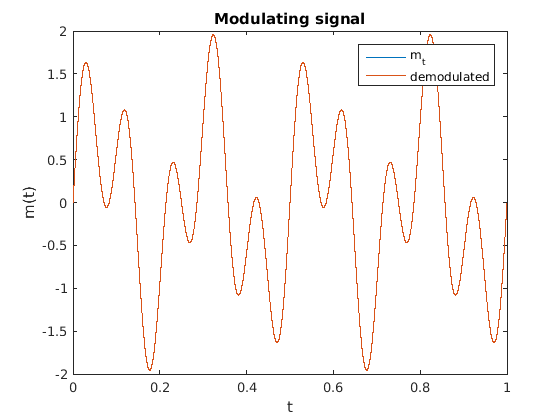

In [2]:
clc;clear all;close all;
%% Parâmetros da onda
fc = 6000;                                              % Frequência da portadora
fm = 10;                                                % Frequência do sinal
Am = 1;                                                 % Amplitude do sinal 
Theta = pi/4;                                           % Fase do sinal
Beta = pi/5;                                            % Fase da portadora
Fs = 8*fc;                                              % Frequência de amostragem
duration = 0.5;                                         % Tempo final
t = 0:1/Fs:1-1/Fs;                                      % Eixo do tempo
 
m_t = Am*sin(2*pi*fm*t)+Am*sin(2*pi*0.4*fm*t);          % Sinal em banda base
kf=160*pi;                                              % Sensibilidade de frequencia 
m_intg=kf*1/Fs*cumsum(m_t);                             % Integral com Kf
x = cos(2*pi*fc*t +m_intg );                            % Sinal modulado

%% Hilbert
z= hilbert(x);                                          % Forma analítica (real + imaginário)
inst_phase = unwrap(angle(z));                          % Fase instantânea com ajuste para variações bruscas de ângulo
p = polyfit(t,inst_phase,1);                            % Ajustar linearmente a fase instantânea
% Reavaliar o termo de compensação usando os valores ajustados
estimated = polyval(p,t);                               
demodulated = inst_phase - estimated;
demodulated=diff([demodulated(1) demodulated])/(1/Fs*kf);
%% Gráfico
plot(t,m_t,t,demodulated) 
axis([0 1 -2 2])
title('Demodulação FM com a Transforda de Hilbert'); 
xlabel('Tempo [s]'); 
ylabel('Amplitude')
legend('m(t) original','m(t) demodulado')

Para fazer esse experimento em Python, iremos importar a biblioteca **scipy** para termos acesso a um conjunto de funções de manipulação de sinais (e.g. a transformada de Hilbert). 

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_8.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

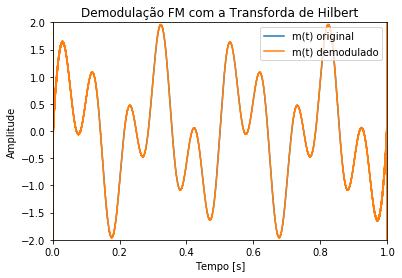

In [1]:
# Parâmetros da onda
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Sinal em banda-base
fm = 10;                                                  # Frequência do sinal
Am = 1;                                                   # Amplitude do sinal 
fc = 6000;
Fs = 8*fc;                                                # Frequência de amostragem
t =  np.arange(0,1-1/Fs,1/Fs)                             # Eixo do tempo
m_t = Am*np.sin(2*np.pi*fm*t)+Am*np.sin(2*np.pi*0.4*fm*t) # Sinal em banda base

# Modulação FM
fc = 6000;                                                # Frequência da portadora
kf=160*np.pi;                                             # Sensibilidade de frequência 
m_intg=kf*np.cumsum(m_t)/Fs;                              # Integral com Kf
x = np.cos(2*np.pi*fc*t +m_intg )                         # Sinal modulado

# Hilbert
z= hilbert(x)                                             # Sinal analítico (real + imaginário)
inst_phase = np.unwrap(np.angle(z));                      # Fase instantânea com ajuste para variações bruscas de ângulo
p = np.polyfit(t,inst_phase,1);                           # Ajustar linearmente a fase instantânea
# Reavaliar o termo de compensação usando os valores ajustados
estimated = np.polyval(p,t);                               
demodulated = inst_phase - estimated;
demodulated_aux = np.concatenate(([demodulated[0]],demodulated))
demodulated=np.diff(demodulated_aux)/(1/Fs*kf);

# Gráficos
plt.title('Demodulação FM com a Transforda de Hilbert')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.plot(t,m_t,t,demodulated)
plt.ylim([-2,2])
plt.xlim([0,1])
plt.legend(['m(t) original','m(t) demodulado'])
plt.show()

### Comentários sobre o código

- O sinal modulante é composto de duas senoides com frequência 10 e 4 Hz, e é produzido com o seguinte trecho de código:
```python
m_t = Am*np.sin(2*np.pi*fm*t)+Am*np.sin(2*np.pi*0.4*fm*t) # Sinal em banda base
```

- Para fazermos a modulação FM, foi definido um valor para $kf$ de 160$\pi$, $f_c = 6$ kHz, e a integral discreta de $m(t)$ foi realizada pela função **cumsum**. O sinal FM é montado seguindo sua definição:
```python
fc = 6000;                                                # Frequência da portadora
kf=160*np.pi;                                             # Sensibilidade de frequência 
m_intg=kf*np.cumsum(m_t)/Fs;                              # Integral com Kf
x = np.cos(2*np.pi*fc*t +m_intg )                         # Sinal modulado
```

- A demodulação FM foi realizada por meio do método de estimação de frequência via transformada de Hilbert. Incialmente, calcula-se a transformada de Hilbert e se obtém o sinal analítico. A fase do sinal analítico é estimada e alguns ajustes são feitos para compensar as variações bruscas de ângulo. A derivada da fase do sinal analítico é calculada e dividida por kf, encontrando o $m(t)$ estimado.
```python
z= hilbert(x)                                             # Sinal analítico (real + imaginário)
inst_phase = np.unwrap(np.angle(z));                      # Fase instantânea com ajuste para variações bruscas de ângulo
p = np.polyfit(t,inst_phase,1);                           # Ajustar linearmente a fase instantânea
```
# Reavaliar o termo de compensação usando os valores ajustados
```python
estimated = np.polyval(p,t);                               
demodulated = inst_phase - estimated;
demodulated_aux = np.concatenate(([demodulated[0]],demodulated))
demodulated=np.diff(demodulated_aux)/(1/Fs*kf);
```
- O restante do código se destina à plotagem do sinal modulante e do sinal demodulado no tempo. 

**Passo 3: (para o relatório)**: escreva um script em Python que modele a modulação e demodulação AM-DSB por meio da transformada de Hilbert. O seu código deve implementar:
- Modulação AM-DSB
> - Sinal modulante:
    - Frequência de amostragem = 600;
    - Eixo do tempo de 0 a 1;
    - Frequência do sinal = 3;
  - Sinal portadora:
    - Frequência da portadora = 50;
    - Índice de modulação = 0,7    
- Demodulação AM-DSB
> - Regeneração do sinal modulante por meio da transformada de Hilbert
  - Regeneração da portadora por meio da transformada de Hilbert
- Gráficos
> - Gráfico do sinal modulante, do sinal modulado e do sinal regenerado no tempo (três linhas no mesmo gráfico, identificadas por legenda)
  - Espectro do sinal modulante e regenerado (duas linhas no mesmo gráfico, identificadas por legenda)
  - Espectro do sinal modulado
  - Portadora regenerada por meio da transformada de Hilbert

# Bibliografia

John G. Proakis, Masoud Salehi, John G. Proakis, Modern Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013.

HAYKIN, S.; MOHER, M. Sistemas de comunicação. 5. ed. Porto Alegre: Bookman, 2011. 512 p.

C. Richard Johnson Jr, William A. Sethares, Andrew G. Klein, Software Receiver Design 1st Edition, Cambridge University Press; 1 edition (August 18, 2011).

Lathi,B. P., Sistemas de Comunicações Analógicos e Digitais Modernos - 4ª Ed, LTC, 2012.


Varsha Mathuranathan, Digital Modulations using Matlab: Build Simulation Models (http://www.gaussianwaves.com ).

